In [1]:
!pip install wget torchinfo
!wget -O NCT-CRC-HE-100K.zip https://zenodo.org/record/1214456/files/NCT-CRC-HE-100K.zip
!unzip -qq NCT-CRC-HE-100K.zip -d train

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=2cdf7a6f1f7a1a1958e593e5758833e9d67bb959719b80300e7fefe5d1f876ce
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget
--2025-02-23 06:20:37--  https://zenodo.org/record/1214456/files/NCT-CRC-HE-100K.zip
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.45.92, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/1214456/files/NCT-CRC-HE-100K.zip [following]
--2025-02-23 06:20:38--  https://zenodo.org/records/1214456/files/NCT-CRC-HE-100K.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 11690284003 (11G) [application/octet-stream]
Saving to: ‘NCT-CRC-HE-100K.zip’

NCT-CRC-HE-100K.zip 100%[===================>] 

In [2]:
!pip install peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [3]:
import timm
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset
import numpy as np
from tqdm import tqdm

import itertools
from torchinfo import summary
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix
from PIL import Image

from matplotlib import pyplot as plt

import random
import torchvision.transforms.functional as TF

from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
#import torchtune

In [4]:
!pip install torchao

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 87.5 MB/s eta 0:00:00


In [5]:
!pip install torchtune

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.3/810.3 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.6 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py

In [6]:
from torchtune.modules.peft import LoRALinear

### LoRA Minimum rank 32



In [427]:
def convert_to_lora_model(model, rank=16, alpha=32, exclude=[]):
    for name, module in model.named_children():
        if name in exclude:
            continue
        if isinstance(module, nn.Linear):
            lora_linear = LoRALinear(
                in_dim=module.in_features,
                out_dim=module.out_features,
                rank=rank,
                alpha=alpha,
                use_bias=module.bias is not None
            )
            lora_linear.weight.data = module.weight.data #모델이 처음부터 다시 학습할 필요 없게 하기 위해
            if module.bias is not None:
                lora_linear.bias.data = module.bias.data
            lora_linear.to(module.weight.device)
            # 기존 linear layer를 loRA linear로 교체체
            setattr(model, name, lora_linear)
        # 재귀함수 (하위모듈도 확인)
        else:
            convert_to_lora_model(module, rank, alpha, exclude)

    return model

In [428]:
class ConvNorm(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=2, padding=1):
        super(ConvNorm, self).__init__()
        self.linear = nn.Conv2d(
            in_channels, out_channels, kernel_size=kernel_size,
            stride=stride, padding=padding, bias=False
        )
        self.bn = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        x = self.linear(x)
        x = self.bn(x)
        return x

In [429]:
class Stem16(nn.Module):
    def __init__(self):
        super(Stem16, self).__init__()
        self.conv1 = ConvNorm(3, 32)
        self.act1 = nn.Hardswish()
        self.conv2 = ConvNorm(32, 64)
        self.act2 = nn.Hardswish()
        self.conv3 = ConvNorm(64, 128)
        self.act3 = nn.Hardswish()
        self.conv4 = ConvNorm(128, 256)

    def forward(self, x):
        x = self.act1(self.conv1(x))
        x = self.act2(self.conv2(x))
        x = self.act3(self.conv3(x))
        x = self.conv4(x)
        return x

In [430]:
class LinearNorm(nn.Module):
    def __init__(self, in_features, out_features):
        super(LinearNorm, self).__init__()
        self.linear = nn.Linear(in_features, out_features, bias=False)
        self.bn = nn.BatchNorm1d(out_features)

    def forward(self, x):

        if x.dim() == 3:
            B, N, C = x.shape
            x = x.reshape(B * N, C)
            x = self.bn(self.linear(x))
            x = x.reshape(B, N, -1)
        else:
            x = self.bn(self.linear(x))
        return x

In [431]:
class Attention(nn.Module):
    def __init__(self, dim, num_heads, attn_ratio=2):
        super(Attention, self).__init__()
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = head_dim ** -0.5
        inner_dim = head_dim * num_heads * 3
        self.qkv = LinearNorm(dim, inner_dim)

        self.proj = nn.Sequential(
            nn.Hardswish(),
            LinearNorm(dim, dim)
        )

        self.attention_biases = None
        self.attention_bias_idxs = None

    def compute_attention_bias(self, resolution):

        points = list(itertools.product(range(resolution), range(resolution)))
        N = len(points)

        attention_offsets = {}
        idxs = []

        # if N = 196, then resolution = 14
        for p1 in points:
            for p2 in points:
                offset = (abs(p1[0] - p2[0]), abs(p1[1] - p2[1]))
                if offset not in attention_offsets:
                    attention_offsets[offset] = len(attention_offsets)
                idxs.append(attention_offsets[offset])

        num_offsets = len(attention_offsets)

        # 각 attention head에 대해 num_offsets 만큼의 학습 가능한 Bias를 생성
        self.attention_biases = nn.Parameter(torch.zeros(self.num_heads, num_offsets).to(next(self.parameters()).device))
        self.attention_bias_idxs = torch.LongTensor(idxs).view(N, N).to(next(self.parameters()).device)

    def forward(self, x):
        B, N, C = x.shape
        resolution = int(N ** 0.5)

        if self.attention_biases is None or self.attention_bias_idxs.shape[0] != N:
            self.compute_attention_bias(resolution)

        qkv = self.qkv(x)
        qkv = qkv.view(B, N, 3, self.num_heads, C // self.num_heads).permute(2, 0, 3, 1, 4)
        # qkv: (3, B, num_heads, N, head_dim)
        q, k, v = qkv[0], qkv[1], qkv[2] # q, k, v: (B, num_heads, N, head_dim)

        attn = (q @ k.transpose(-2, -1)) * self.scale # attn: (B, num_heads, N, N)
        attn_bias = self.attention_biases[:, self.attention_bias_idxs].unsqueeze(0) # attn_bias: (1, num_heads, N, N)
        attn = attn + attn_bias
        attn = attn.softmax(dim=-1)

        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        return self.proj(x)


In [432]:
class LevitMlp(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(LevitMlp, self).__init__()
        self.ln1 = LinearNorm(in_features, hidden_features)
        self.act = nn.Hardswish()
        self.drop = nn.Dropout(p=0.5, inplace=False)#dropout 적용
        self.ln2 = LinearNorm(hidden_features, out_features)

    def forward(self, x):
        x = self.ln1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.ln2(x)
        return x

In [433]:
class LevitBlock(nn.Module):
    def __init__(self, dim, num_heads, mlp_ratio=2):
        super(LevitBlock, self).__init__()
        self.attn = Attention(dim, num_heads)
        self.drop_path1 = nn.Identity()
        self.mlp = LevitMlp(dim, dim * mlp_ratio, dim)
        self.drop_path2 = nn.Identity()

    def forward(self, x):
        x = x + self.drop_path1(self.attn(x))
        x = x + self.drop_path2(self.mlp(x))
        return x

In [434]:
class CNNDownsample(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(CNNDownsample, self).__init__()
        self.out_channels = out_channels
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1)
        self.act = nn.Hardswish()

    def forward(self, x):
        # print(x.shape)
        B, N, C = x.shape # (B, N, C)  N=H*W (16 * 16 = 196)
        H = int(np.sqrt(N))
        x = x.view(B, H, H, C).permute(0, 3, 1, 2)
        x = self.conv(x)
        x = self.act(x)
        x = x.permute(0, 2, 3, 1).view(B, -1, self.out_channels)
        return x

In [435]:
class LevitStage(nn.Module):
    def __init__(self, dim, out_dim, num_heads, num_blocks, downsample=True):
        super(LevitStage, self).__init__()
        self.downsample = CNNDownsample(dim, out_dim) if downsample else nn.Identity()
        self.blocks = nn.Sequential(*[LevitBlock(out_dim, num_heads) for _ in range(num_blocks)])

    def forward(self, x):
        x = self.downsample(x)
        x = self.blocks(x)
        return x

In [436]:
import torch.nn.functional as F

class LevitStage_TinyFusion(nn.Module):
    def __init__(self, dim, out_dim, num_heads, num_blocks, num_select, downsample=True):
        super(LevitStage_TinyFusion, self).__init__()
        assert num_select <= num_blocks
        self.downsample = CNNDownsample(dim, out_dim) if downsample else nn.Identity()
        self.blocks = nn.Sequential(*[LevitBlock(out_dim, num_heads) for _ in range(num_blocks)])
        self.num_blocks = num_blocks
        self.num_select = num_select
        init_probs = torch.ones(num_blocks) / num_blocks
        self.gumbel_gate = nn.Parameter(torch.log(init_probs))


    def forward(self, x, tau=1):
        x = self.downsample(x)

        if self.training:
            gate_probs = F.gumbel_softmax(self.gumbel_gate, tau=tau, hard=False)
        else:
            gate_probs = F.gumbel_softmax(self.gumbel_gate, tau=tau, hard=True)

        for i in range(self.num_blocks):
            if gate_probs[i] > 0: # skip zero blocks
              x = x + gate_probs[i] * self.blocks[i](x)
        return x

In [437]:
class ConvLevitStage(nn.Module):
    def __init__(self, in_channels, out_channels, num_blocks, kernel_size, stride, padding):
        super(ConvLevitStage, self).__init__()
        self.layers = nn.Sequential(
            *[nn.Conv2d(in_channels if i == 0 else out_channels, out_channels, kernel_size, stride, padding)
              for i in range(num_blocks)],
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.layers(x)

In [438]:
class NormLinear(nn.Module):
    def __init__(self, in_features, out_features, dropout_prob=0.5):#drop_out_0.5 적용
        super(NormLinear, self).__init__()
        self.bn = nn.BatchNorm1d(in_features)
        self.drop = nn.Dropout(p=dropout_prob, inplace=False)
        self.linear = nn.Linear(in_features, out_features, bias=True)

    def forward(self, x):
        x = self.bn(x)
        x = self.drop(x)
        x = self.linear(x)
        return x

In [439]:
class LevitDistilledTinyfusion(nn.Module):
    def __init__(self, num_classes=9):
        super(LevitDistilledTinyfusion, self).__init__()

        self.stem = Stem16()

        self.stage1 = LevitStage_TinyFusion(dim=256, out_dim=256, num_heads=4, num_blocks=4, num_select=2, downsample=False) # block 수 적용
        self.stage2 = LevitStage_TinyFusion(dim=256, out_dim=384, num_heads=6, num_blocks=4, num_select=2, downsample=True)

        self.conv1x1 = nn.Sequential(
            nn.Conv2d(384, 512, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True)
        )

        self.head = NormLinear(in_features=512, out_features=num_classes, dropout_prob=0.0)
        self.head_dist = NormLinear(in_features=512, out_features=num_classes, dropout_prob=0.0)

    def forward(self, x, tau):
        x = self.stem(x)

        B, C, H, W = x.shape
        x = x.view(B, C, -1).transpose(1, 2)
        x = self.stage1(x, tau)
        x = self.stage2(x, tau)

        H = W = int(x.shape[1]**0.5)
        x = x.transpose(1, 2).view(B, 384, H, W)

        x = self.conv1x1(x)

        x = torch.mean(x, dim=(2, 3))
        out = self.head(x)
        out_dist = self.head_dist(x)
        return out

In [440]:
class LevitDistilled(nn.Module):
    def __init__(self, num_classes=9):
        super(LevitDistilled, self).__init__()

        self.stem = Stem16()

        self.stage1 = LevitStage(dim=256, out_dim=256, num_heads=4, num_blocks=4, downsample=False) # block 수 적용
        self.stage2 = LevitStage(dim=256, out_dim=384, num_heads=6, num_blocks=4, downsample=True)

        self.conv1x1 = nn.Sequential(
            nn.Conv2d(384, 512, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True)
        )

        self.head = NormLinear(in_features=512, out_features=num_classes, dropout_prob=0.0)
        self.head_dist = NormLinear(in_features=512, out_features=num_classes, dropout_prob=0.0)

    def forward(self, x):
        x = self.stem(x)

        B, C, H, W = x.shape
        x = x.view(B, C, -1).transpose(1, 2)
        x = self.stage1(x)
        x = self.stage2(x)

        H = W = int(x.shape[1]**0.5)
        x = x.transpose(1, 2).view(B, 384, H, W)

        x = self.conv1x1(x)

        x = torch.mean(x, dim=(2, 3))
        out = self.head(x)
        out_dist = self.head_dist(x)
        return out

In [441]:
model = LevitDistilledTinyfusion(num_classes=9)

In [442]:
print(model)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

batch_size = 32
learning_rate = 5e-4
num_epochs = 200
weight_decay = 1e-5

LevitDistilledTinyfusion(
  (stem): Stem16(
    (conv1): ConvNorm(
      (linear): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (act1): Hardswish()
    (conv2): ConvNorm(
      (linear): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (act2): Hardswish()
    (conv3): ConvNorm(
      (linear): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (act3): Hardswish()
    (conv4): ConvNorm(
      (linear): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (stage1): Levi

In [443]:
print(summary(model, input_size=(32, 3, 224, 224), tau = 10))

Layer (type:depth-idx)                                  Output Shape              Param #
LevitDistilledTinyfusion                                [32, 9]                   --
├─Stem16: 1-1                                           [32, 256, 14, 14]         --
│    └─ConvNorm: 2-1                                    [32, 32, 112, 112]        --
│    │    └─Conv2d: 3-1                                 [32, 32, 112, 112]        864
│    │    └─BatchNorm2d: 3-2                            [32, 32, 112, 112]        64
│    └─Hardswish: 2-2                                   [32, 32, 112, 112]        --
│    └─ConvNorm: 2-3                                    [32, 64, 56, 56]          --
│    │    └─Conv2d: 3-3                                 [32, 64, 56, 56]          18,432
│    │    └─BatchNorm2d: 3-4                            [32, 64, 56, 56]          128
│    └─Hardswish: 2-4                                   [32, 64, 56, 56]          --
│    └─ConvNorm: 2-5                                  

In [444]:
print(summary(model, input_size=(32, 3, 224, 224), verbose=2, tau = 10))

Layer (type:depth-idx)                                  Output Shape              Param #
LevitDistilledTinyfusion                                [32, 9]                   --
├─Stem16: 1-1                                           [32, 256, 14, 14]         --
│    └─conv1.linear.weight                                                        ├─864
│    └─conv1.bn.weight                                                            ├─32
│    └─conv1.bn.bias                                                              ├─32
│    └─conv2.linear.weight                                                        ├─18,432
│    └─conv2.bn.weight                                                            ├─64
│    └─conv2.bn.bias                                                              ├─64
│    └─conv3.linear.weight                                                        ├─73,728
│    └─conv3.bn.weight                                                            ├─128
│    └─conv3.bn.bias              

In [445]:
import torch.nn.init as init

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # CUDA 연산 시 동일한 결과 보장
    torch.cuda.manual_seed_all(seed)  # 멀티-GPU 환경에서 동일한 결과 보장
    torch.backends.cudnn.deterministic = True  # CuDNN 연산을 deterministic하게 설정
    torch.backends.cudnn.benchmark = False  # 연산 속도를 희생하고 일관된 연산을 수행

def initialize_weights(m):
    if isinstance(m, nn.Conv2d):  # Conv 레이어 초기화
        init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        if m.bias is not None:
            init.constant_(m.bias, 0)
    elif isinstance(m, nn.Linear):  # Linear 레이어 초기화
        init.xavier_uniform_(m.weight)
        if m.bias is not None:
            init.constant_(m.bias, 0)
    elif isinstance(m, nn.BatchNorm2d) or isinstance(m, nn.BatchNorm1d):  # BatchNorm 초기화
        init.constant_(m.weight, 1)
        init.constant_(m.bias, 0)

set_seed(42)  # 랜덤 시드 고정
model.apply(initialize_weights)

LevitDistilledTinyfusion(
  (stem): Stem16(
    (conv1): ConvNorm(
      (linear): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (act1): Hardswish()
    (conv2): ConvNorm(
      (linear): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (act2): Hardswish()
    (conv3): ConvNorm(
      (linear): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (act3): Hardswish()
    (conv4): ConvNorm(
      (linear): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (stage1): Levi

In [446]:
train_dir = './train/NCT-CRC-HE-100K'

In [447]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [448]:
dataset = datasets.ImageFolder(root=train_dir, transform=transform)

In [449]:
import json

with open("index_dict.json", "r") as f:
    index_dict = json.load(f)
load_train_idx = index_dict["train_idx"]
load_val_idx = index_dict["val_idx"]
load_test_idx = index_dict["test_idx"]

In [450]:
train_data = Subset(dataset, load_train_idx)
val_data = Subset(dataset, load_val_idx)
test_data = Subset(dataset, load_test_idx)

In [451]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

print(f"Train set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

Train set size: 70000
Validation set size: 15000
Test set size: 15000


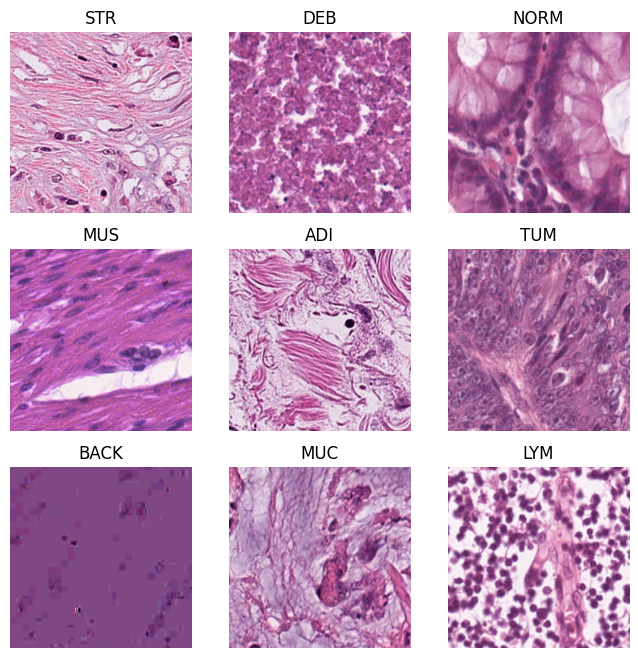

In [452]:
# Show one example per class from the training dataset
import matplotlib.pyplot as plt

# Prepare a dictionary to store one example per class
class_examples = {}
for images, labels in train_loader:
    for img, label in zip(images, labels):
        label = label.item()
        if label not in class_examples:
            class_examples[label] = img
        # Stop if we already have one example for each class
        if len(class_examples) == len(dataset.classes):
            break
    if len(class_examples) == len(dataset.classes):
        break

# Display the images and their labels
figure = plt.figure(figsize=(8, 8))
cols = 3  # You can adjust the number of columns as needed
rows = (len(dataset.classes) + cols - 1) // cols  # Calculate required rows
for i, (label, img) in enumerate(class_examples.items(), start=1):
    figure.add_subplot(rows, cols, i)
    plt.title(dataset.classes[label])
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0).numpy())  # Convert tensor to numpy for display
plt.show()

In [453]:
gumbel_params = []
other_params = []
exclude = ["head", "head_dist"]

for name, module in model.named_children():
    if name in exclude:
        print(exclude)

for name, param in model.named_parameters():
    if "gumbel_gate" in name:
        gumbel_params.append(param)
        print(name)
    else:
        other_params.append(param)

#model = convert_to_lora_model(model, exclude=exclude)

['head', 'head_dist']
['head', 'head_dist']
stage1.gumbel_gate
stage2.gumbel_gate


In [454]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam([
    {'params' : gumbel_params, 'lr': learning_rate * 10},
    {'params' : other_params, 'lr': learning_rate, 'weight_decay': 1e-5}
])

In [455]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

In [456]:
def train(model, train_loader, criterion, optimizer, device, epoch, total_epcohs=200):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    tau_max = 1
    tau_min = 0.1
    total_steps = total_epcohs * len(train_loader)
    train_steps = epoch * len(train_loader)

    for i, (inputs, labels) in enumerate(tqdm(train_loader, desc="Training")):
        tau = tau_max - (tau_max - tau_min) * min(1.0, (train_steps + i) / total_steps)
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, tau)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    print(f"Train Loss: {epoch_loss:.4f}, Train Accuracy: {accuracy:.2f}%")
    print(f"Tau: {tau:.4f}")
    train_losses.append(epoch_loss)
    train_accuracies.append(accuracy)

    print("Each stage of block probabilities:")
    for name, module in model.named_modules():
        if isinstance(module, LevitStage_TinyFusion):
            gate_probs = torch.softmax(module.gumbel_gate, dim=0) # 각 block의 확률
            topk_indx = torch.topk(gate_probs, module.num_select).indices.tolist() # 상위 k개의 index
            print(f"{name}")
            for i, prob in enumerate(gate_probs):
                mask = " " if i in topk_indx else "*" # mask
                print(f"Block {i}: {prob:.4f} {mask}")


In [457]:
def evaluate(model, data_loader, criterion, device, phase="Validation", epoch=0, total_epcohs=200):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    tau_max = 1
    tau_min = 0.1
    total_steps = total_epcohs * len(data_loader)
    train_steps = epoch * len(data_loader)

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(tqdm(data_loader, desc=f"{phase}")):
            inputs, labels = inputs.to(device), labels.to(device)
            if phase == "Validation":
                tau = tau_max - (tau_max - tau_min) * min(1.0, (train_steps + i) / total_steps)
            elif phase == "Test":
                tau = 1e-5
            outputs = model(inputs, tau)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Save all labels and predictions for balanced accuracy
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    epoch_loss = running_loss / len(data_loader)
    accuracy = 100 * correct / total
    balanced_acc = balanced_accuracy_score(all_labels, all_predictions)

    print(f"{phase} Loss: {epoch_loss:.4f}, {phase} Accuracy: {accuracy:.2f}%")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"Tau: {tau:.4f}")

    val_losses.append(epoch_loss)
    val_accuracies.append(accuracy)

In [458]:
def measure_inference_time(model, data_loader, device):
    model.eval()
    times = []

    with torch.no_grad():
        for inputs, _ in data_loader:
            inputs = inputs.to(device)
            start_time = torch.cuda.Event(enable_timing=True)
            end_time = torch.cuda.Event(enable_timing=True)

            start_time.record()
            _ = model(inputs, tau=0.1)  # inference 수행
            end_time.record()

            # 시간 측정
            torch.cuda.synchronize()  # CUDA에서 모든 커널이 완료될 때까지 대기
            elapsed_time = start_time.elapsed_time(end_time)  # 밀리초 단위로 반환
            times.append(elapsed_time)

    # 통계량 계산
    times_np = np.array(times)
    total_inferences = len(times_np)
    avg_time = np.mean(times_np)
    std_dev = np.std(times_np)
    max_time = np.max(times_np)
    min_time = np.min(times_np)

    # 결과 출력
    print(f"Inference Time Measurement Results:")
    print(f"Total Inferences: {total_inferences}")
    print(f"Average Time: {avg_time:.2f} ms")
    print(f"Standard Deviation: {std_dev:.2f} ms")
    print(f"Maximum Time: {max_time:.2f} ms")
    print(f"Minimum Time: {min_time:.2f} ms")

    return times

In [459]:
# gumbel_gate 파라미터가 포함되어 있는지 확인
for name, param in model.named_parameters():
    print(f"Parameter name: {name}, requires_grad: {param.requires_grad}")

Parameter name: stem.conv1.linear.weight, requires_grad: True
Parameter name: stem.conv1.bn.weight, requires_grad: True
Parameter name: stem.conv1.bn.bias, requires_grad: True
Parameter name: stem.conv2.linear.weight, requires_grad: True
Parameter name: stem.conv2.bn.weight, requires_grad: True
Parameter name: stem.conv2.bn.bias, requires_grad: True
Parameter name: stem.conv3.linear.weight, requires_grad: True
Parameter name: stem.conv3.bn.weight, requires_grad: True
Parameter name: stem.conv3.bn.bias, requires_grad: True
Parameter name: stem.conv4.linear.weight, requires_grad: True
Parameter name: stem.conv4.bn.weight, requires_grad: True
Parameter name: stem.conv4.bn.bias, requires_grad: True
Parameter name: stage1.gumbel_gate, requires_grad: True
Parameter name: stage1.blocks.0.attn.attention_biases, requires_grad: True
Parameter name: stage1.blocks.0.attn.qkv.linear.weight, requires_grad: True
Parameter name: stage1.blocks.0.attn.qkv.bn.weight, requires_grad: True
Parameter name: s

In [460]:
def transfer_weights(pretrained_model: LevitDistilled, tinyfusion_model: LevitDistilledTinyfusion, num_blocks):

    pretrained_dict = pretrained_model.state_dict()
    tinyfusion_dict = tinyfusion_model.state_dict()

    new_state_dict = {}

    # 1️⃣ 공통된 가중치 복사 (stem, conv1x1, head, head_dist)
    for key in tinyfusion_dict.keys():
        if key in pretrained_dict and not key.startswith("stage"):
            new_state_dict[key] = pretrained_dict[key]

    stage = []
    for i in range(num_blocks):
        stage.append(f"stage{i}")
    # 2️⃣ stage1, stage2의 가중치 변환 적용
    for stage_name in stage:
        for i in range(num_blocks):  # num_blocks=4
            old_key = f"{stage_name}.blocks.{i}"  # 원래 모델의 key
            new_key = f"{stage_name}.blocks.{i}"  # TinyFusion 모델의 key

            if old_key in pretrained_dict and new_key in tinyfusion_dict:
                new_state_dict[new_key] = pretrained_dict[old_key]

    # 3️⃣ `gumble_gate`는 원래 모델에 없으므로, 초기화된 값 유지 (로드 안함)
    print("✅ 가중치 변환 완료! TinyFusion 모델에 적용합니다.")

    # 4️⃣ 변환된 가중치를 TinyFusion 모델에 로드 (strict=False)
    tinyfusion_model.load_state_dict(new_state_dict, strict=False)

In [461]:
pretrained_model = LevitDistilled(num_classes=9)
pretrained_model.stage1.blocks[0].attn.compute_attention_bias(14)
pretrained_model.stage1.blocks[1].attn.compute_attention_bias(14)
pretrained_model.stage1.blocks[2].attn.compute_attention_bias(14)
pretrained_model.stage1.blocks[3].attn.compute_attention_bias(14)
pretrained_model.stage2.blocks[0].attn.compute_attention_bias(7)
pretrained_model.stage2.blocks[1].attn.compute_attention_bias(7)
pretrained_model.stage2.blocks[2].attn.compute_attention_bias(7)
pretrained_model.stage2.blocks[3].attn.compute_attention_bias(7)
pretrained_model.load_state_dict(torch.load("HoViT_44_default_baseline.pth"))

<ipython-input-461-4318225f3618>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_model.load_state_dict(torch.load("HoViT_44_default_baseline.pth"))


<All keys matched successfully>

In [462]:
transfer_weights(pretrained_model, model, num_blocks=4)

✅ 가중치 변환 완료! TinyFusion 모델에 적용합니다.


In [463]:
model = convert_to_lora_model(model, exclude=exclude)

In [464]:
# gumbel_gate 파라미터가 포함되어 있는지 확인
for name, param in model.named_parameters():
    print(f"Parameter name: {name}, requires_grad: {param.requires_grad}")

Parameter name: stem.conv1.linear.weight, requires_grad: True
Parameter name: stem.conv1.bn.weight, requires_grad: True
Parameter name: stem.conv1.bn.bias, requires_grad: True
Parameter name: stem.conv2.linear.weight, requires_grad: True
Parameter name: stem.conv2.bn.weight, requires_grad: True
Parameter name: stem.conv2.bn.bias, requires_grad: True
Parameter name: stem.conv3.linear.weight, requires_grad: True
Parameter name: stem.conv3.bn.weight, requires_grad: True
Parameter name: stem.conv3.bn.bias, requires_grad: True
Parameter name: stem.conv4.linear.weight, requires_grad: True
Parameter name: stem.conv4.bn.weight, requires_grad: True
Parameter name: stem.conv4.bn.bias, requires_grad: True
Parameter name: stage1.gumbel_gate, requires_grad: True
Parameter name: stage1.blocks.0.attn.attention_biases, requires_grad: True
Parameter name: stage1.blocks.0.attn.qkv.linear.weight, requires_grad: True
Parameter name: stage1.blocks.0.attn.qkv.linear.lora_a.weight, requires_grad: True
Parame

In [465]:
for name, param in model.named_parameters():
    if "lora_a" in name or "lora_b" in name:
        param.requires_grad = True
        print(f"✅ LoRA Trainable: {name}")
    elif "gumbel_gate" in name:
        param.requires_grad = True
        print(f"✅ TinyFusion Trainable: {name}")
    elif "head" in name or "head_dist" in name:
        param.requires_grad = True
        print(f"✅ Head Trainable: {name}")
    elif "conv1x1" in name:
        param.requires_grad = True
        print(f"✅ Conv1x1 Trainable: {name}")
    #elif "attention_biases" in name:
        #param.requires_grad = True
        #print(f"✅ Attention Biases Trainable: {name}")
    else:
        param.requires_grad = False

✅ TinyFusion Trainable: stage1.gumbel_gate
✅ LoRA Trainable: stage1.blocks.0.attn.qkv.linear.lora_a.weight
✅ LoRA Trainable: stage1.blocks.0.attn.qkv.linear.lora_b.weight
✅ LoRA Trainable: stage1.blocks.0.attn.proj.1.linear.lora_a.weight
✅ LoRA Trainable: stage1.blocks.0.attn.proj.1.linear.lora_b.weight
✅ LoRA Trainable: stage1.blocks.0.mlp.ln1.linear.lora_a.weight
✅ LoRA Trainable: stage1.blocks.0.mlp.ln1.linear.lora_b.weight
✅ LoRA Trainable: stage1.blocks.0.mlp.ln2.linear.lora_a.weight
✅ LoRA Trainable: stage1.blocks.0.mlp.ln2.linear.lora_b.weight
✅ LoRA Trainable: stage1.blocks.1.attn.qkv.linear.lora_a.weight
✅ LoRA Trainable: stage1.blocks.1.attn.qkv.linear.lora_b.weight
✅ LoRA Trainable: stage1.blocks.1.attn.proj.1.linear.lora_a.weight
✅ LoRA Trainable: stage1.blocks.1.attn.proj.1.linear.lora_b.weight
✅ LoRA Trainable: stage1.blocks.1.mlp.ln1.linear.lora_a.weight
✅ LoRA Trainable: stage1.blocks.1.mlp.ln1.linear.lora_b.weight
✅ LoRA Trainable: stage1.blocks.1.mlp.ln2.linear.lora_a

In [466]:
# gumbel_gate 파라미터가 포함되어 있는지 확인
for name, param in model.named_parameters():
    print(f"Parameter name: {name}, requires_grad: {param.requires_grad}")

Parameter name: stem.conv1.linear.weight, requires_grad: False
Parameter name: stem.conv1.bn.weight, requires_grad: False
Parameter name: stem.conv1.bn.bias, requires_grad: False
Parameter name: stem.conv2.linear.weight, requires_grad: False
Parameter name: stem.conv2.bn.weight, requires_grad: False
Parameter name: stem.conv2.bn.bias, requires_grad: False
Parameter name: stem.conv3.linear.weight, requires_grad: False
Parameter name: stem.conv3.bn.weight, requires_grad: False
Parameter name: stem.conv3.bn.bias, requires_grad: False
Parameter name: stem.conv4.linear.weight, requires_grad: False
Parameter name: stem.conv4.bn.weight, requires_grad: False
Parameter name: stem.conv4.bn.bias, requires_grad: False
Parameter name: stage1.gumbel_gate, requires_grad: True
Parameter name: stage1.blocks.0.attn.attention_biases, requires_grad: False
Parameter name: stage1.blocks.0.attn.qkv.linear.weight, requires_grad: False
Parameter name: stage1.blocks.0.attn.qkv.linear.lora_a.weight, requires_gra

In [ ]:
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    train(model, train_loader, criterion, optimizer, device, epoch)
    evaluate(model, val_loader, criterion, device, phase="Validation", epoch=epoch)
    if((epoch) % 10 == 0 and epoch > 30):
        save_path = f"HoViT_44_tinyfusion_base_r16a32_{epoch}.pth"
        torch.save(model.state_dict(), save_path)
        print(f"Model weights saved to {save_path}")
        print(f"{epoch+1} model test result:")
        evaluate(model, test_loader, criterion, device, phase="Test")


Epoch 1/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.3163, Train Accuracy: 90.60%
Tau: 0.9955
Each stage of block probabilities:
stage1
Block 0: 0.7938  
Block 1: 0.1071  
Block 2: 0.0587 *
Block 3: 0.0403 *
stage2
Block 0: 0.2018 *
Block 1: 0.1856 *
Block 2: 0.3357  
Block 3: 0.2769  


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.77it/s]


Validation Loss: 0.2655, Validation Accuracy: 91.17%
Balanced Accuracy: 0.9111
Tau: 0.9955

Epoch 2/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.1286, Train Accuracy: 95.71%
Tau: 0.9910
Each stage of block probabilities:
stage1
Block 0: 0.9549  
Block 1: 0.0252  
Block 2: 0.0107 *
Block 3: 0.0092 *
stage2
Block 0: 0.2086 *
Block 1: 0.1862 *
Block 2: 0.3506  
Block 3: 0.2546  


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.46it/s]


Validation Loss: 0.1230, Validation Accuracy: 96.01%
Balanced Accuracy: 0.9595
Tau: 0.9910

Epoch 3/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0894, Train Accuracy: 97.05%
Tau: 0.9865
Each stage of block probabilities:
stage1
Block 0: 0.9867  
Block 1: 0.0065  
Block 2: 0.0041 *
Block 3: 0.0027 *
stage2
Block 0: 0.1957 *
Block 1: 0.1799 *
Block 2: 0.3549  
Block 3: 0.2695  


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.76it/s]


Validation Loss: 0.0869, Validation Accuracy: 97.13%
Balanced Accuracy: 0.9699
Tau: 0.9865

Epoch 4/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.08it/s]


Train Loss: 0.0689, Train Accuracy: 97.74%
Tau: 0.9820
Each stage of block probabilities:
stage1
Block 0: 0.9959  
Block 1: 0.0021  
Block 2: 0.0012 *
Block 3: 0.0007 *
stage2
Block 0: 0.2069 *
Block 1: 0.1521 *
Block 2: 0.4028  
Block 3: 0.2382  


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.69it/s]


Validation Loss: 0.0702, Validation Accuracy: 97.75%
Balanced Accuracy: 0.9767
Tau: 0.9820

Epoch 5/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0552, Train Accuracy: 98.19%
Tau: 0.9775
Each stage of block probabilities:
stage1
Block 0: 0.9977  
Block 1: 0.0010  
Block 2: 0.0007 *
Block 3: 0.0005 *
stage2
Block 0: 0.2190  
Block 1: 0.1161 *
Block 2: 0.4831  
Block 3: 0.1818 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.78it/s]


Validation Loss: 0.0768, Validation Accuracy: 97.61%
Balanced Accuracy: 0.9754
Tau: 0.9775

Epoch 6/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.06it/s]


Train Loss: 0.0441, Train Accuracy: 98.57%
Tau: 0.9730
Each stage of block probabilities:
stage1
Block 0: 0.9985  
Block 1: 0.0008  
Block 2: 0.0004 *
Block 3: 0.0003 *
stage2
Block 0: 0.2145  
Block 1: 0.1180 *
Block 2: 0.4652  
Block 3: 0.2024 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.63it/s]


Validation Loss: 0.0739, Validation Accuracy: 97.72%
Balanced Accuracy: 0.9766
Tau: 0.9730

Epoch 7/200


Training: 100%|██████████| 2188/2188 [03:20<00:00, 10.92it/s]


Train Loss: 0.0361, Train Accuracy: 98.86%
Tau: 0.9685
Each stage of block probabilities:
stage1
Block 0: 0.9989  
Block 1: 0.0006  
Block 2: 0.0003 *
Block 3: 0.0002 *
stage2
Block 0: 0.2073  
Block 1: 0.0981 *
Block 2: 0.5189  
Block 3: 0.1758 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.64it/s]


Validation Loss: 0.0836, Validation Accuracy: 97.67%
Balanced Accuracy: 0.9764
Tau: 0.9685

Epoch 8/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.05it/s]


Train Loss: 0.0275, Train Accuracy: 99.14%
Tau: 0.9640
Each stage of block probabilities:
stage1
Block 0: 0.9994  
Block 1: 0.0002  
Block 2: 0.0002 *
Block 3: 0.0001 *
stage2
Block 0: 0.2064  
Block 1: 0.0854 *
Block 2: 0.5811  
Block 3: 0.1270 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.60it/s]


Validation Loss: 0.0639, Validation Accuracy: 97.95%
Balanced Accuracy: 0.9792
Tau: 0.9640

Epoch 9/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.09it/s]


Train Loss: 0.0249, Train Accuracy: 99.22%
Tau: 0.9595
Each stage of block probabilities:
stage1
Block 0: 0.9997  
Block 1: 0.0001  
Block 2: 0.0001 *
Block 3: 0.0001 *
stage2
Block 0: 0.2142  
Block 1: 0.0805 *
Block 2: 0.5842  
Block 3: 0.1211 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.65it/s]


Validation Loss: 0.0760, Validation Accuracy: 97.78%
Balanced Accuracy: 0.9778
Tau: 0.9595

Epoch 10/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.08it/s]


Train Loss: 0.0195, Train Accuracy: 99.40%
Tau: 0.9550
Each stage of block probabilities:
stage1
Block 0: 0.9997  
Block 1: 0.0001  
Block 2: 0.0001 *
Block 3: 0.0001 *
stage2
Block 0: 0.2033  
Block 1: 0.0807 *
Block 2: 0.6281  
Block 3: 0.0878 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.67it/s]


Validation Loss: 0.0564, Validation Accuracy: 98.23%
Balanced Accuracy: 0.9819
Tau: 0.9550

Epoch 11/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.08it/s]


Train Loss: 0.0168, Train Accuracy: 99.49%
Tau: 0.9505
Each stage of block probabilities:
stage1
Block 0: 0.9997  
Block 1: 0.0001 *
Block 2: 0.0001  
Block 3: 0.0000 *
stage2
Block 0: 0.2221  
Block 1: 0.0793 *
Block 2: 0.6129  
Block 3: 0.0857 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.74it/s]


Validation Loss: 0.0690, Validation Accuracy: 98.01%
Balanced Accuracy: 0.9797
Tau: 0.9505

Epoch 12/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.08it/s]


Train Loss: 0.0141, Train Accuracy: 99.59%
Tau: 0.9460
Each stage of block probabilities:
stage1
Block 0: 0.9997  
Block 1: 0.0001 *
Block 2: 0.0001  
Block 3: 0.0000 *
stage2
Block 0: 0.2458  
Block 1: 0.0607 *
Block 2: 0.6407  
Block 3: 0.0528 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.89it/s]


Validation Loss: 0.0749, Validation Accuracy: 97.72%
Balanced Accuracy: 0.9770
Tau: 0.9460

Epoch 13/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.10it/s]


Train Loss: 0.0125, Train Accuracy: 99.64%
Tau: 0.9415
Each stage of block probabilities:
stage1
Block 0: 0.9998  
Block 1: 0.0001 *
Block 2: 0.0001  
Block 3: 0.0000 *
stage2
Block 0: 0.2412  
Block 1: 0.0428 *
Block 2: 0.6723  
Block 3: 0.0437 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.91it/s]


Validation Loss: 0.0684, Validation Accuracy: 97.99%
Balanced Accuracy: 0.9803
Tau: 0.9415

Epoch 14/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.13it/s]


Train Loss: 0.0117, Train Accuracy: 99.64%
Tau: 0.9370
Each stage of block probabilities:
stage1
Block 0: 0.9998  
Block 1: 0.0001 *
Block 2: 0.0001  
Block 3: 0.0000 *
stage2
Block 0: 0.1914  
Block 1: 0.0335 *
Block 2: 0.7410  
Block 3: 0.0340 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.89it/s]


Validation Loss: 0.0681, Validation Accuracy: 98.16%
Balanced Accuracy: 0.9824
Tau: 0.9370

Epoch 15/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.13it/s]


Train Loss: 0.0105, Train Accuracy: 99.66%
Tau: 0.9325
Each stage of block probabilities:
stage1
Block 0: 0.9998  
Block 1: 0.0001 *
Block 2: 0.0001  
Block 3: 0.0000 *
stage2
Block 0: 0.2190  
Block 1: 0.0319 *
Block 2: 0.7145  
Block 3: 0.0346 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.93it/s]


Validation Loss: 0.0751, Validation Accuracy: 98.12%
Balanced Accuracy: 0.9812
Tau: 0.9325

Epoch 16/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.16it/s]


Train Loss: 0.0104, Train Accuracy: 99.69%
Tau: 0.9280
Each stage of block probabilities:
stage1
Block 0: 0.9998  
Block 1: 0.0001 *
Block 2: 0.0001  
Block 3: 0.0000 *
stage2
Block 0: 0.2738  
Block 1: 0.0328 *
Block 2: 0.6630  
Block 3: 0.0304 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.76it/s]


Validation Loss: 0.0634, Validation Accuracy: 98.06%
Balanced Accuracy: 0.9809
Tau: 0.9280

Epoch 17/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.14it/s]


Train Loss: 0.0091, Train Accuracy: 99.73%
Tau: 0.9235
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.2388  
Block 1: 0.0299 *
Block 2: 0.7074  
Block 3: 0.0238 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.86it/s]


Validation Loss: 0.0539, Validation Accuracy: 98.37%
Balanced Accuracy: 0.9831
Tau: 0.9235

Epoch 18/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.13it/s]


Train Loss: 0.0091, Train Accuracy: 99.74%
Tau: 0.9190
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2530  
Block 1: 0.0408 *
Block 2: 0.6847  
Block 3: 0.0214 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.84it/s]


Validation Loss: 0.0571, Validation Accuracy: 98.33%
Balanced Accuracy: 0.9835
Tau: 0.9190

Epoch 19/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.13it/s]


Train Loss: 0.0080, Train Accuracy: 99.75%
Tau: 0.9145
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2237  
Block 1: 0.0369 *
Block 2: 0.7211  
Block 3: 0.0183 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.83it/s]


Validation Loss: 0.0622, Validation Accuracy: 98.32%
Balanced Accuracy: 0.9833
Tau: 0.9145

Epoch 20/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.12it/s]


Train Loss: 0.0073, Train Accuracy: 99.77%
Tau: 0.9100
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2950  
Block 1: 0.0339 *
Block 2: 0.6548  
Block 3: 0.0164 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.87it/s]


Validation Loss: 0.0514, Validation Accuracy: 98.65%
Balanced Accuracy: 0.9860
Tau: 0.9100

Epoch 21/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.13it/s]


Train Loss: 0.0087, Train Accuracy: 99.72%
Tau: 0.9055
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2530  
Block 1: 0.0313 *
Block 2: 0.7044  
Block 3: 0.0114 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.92it/s]


Validation Loss: 0.0609, Validation Accuracy: 98.38%
Balanced Accuracy: 0.9835
Tau: 0.9055

Epoch 22/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.10it/s]


Train Loss: 0.0071, Train Accuracy: 99.78%
Tau: 0.9010
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2329  
Block 1: 0.0243 *
Block 2: 0.7356  
Block 3: 0.0072 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.68it/s]


Validation Loss: 0.0537, Validation Accuracy: 98.57%
Balanced Accuracy: 0.9854
Tau: 0.9010

Epoch 23/200


Training: 100%|██████████| 2188/2188 [03:20<00:00, 10.90it/s]


Train Loss: 0.0072, Train Accuracy: 99.78%
Tau: 0.8965
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2135  
Block 1: 0.0341 *
Block 2: 0.7443  
Block 3: 0.0081 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.17it/s]


Validation Loss: 0.0532, Validation Accuracy: 98.46%
Balanced Accuracy: 0.9842
Tau: 0.8965

Epoch 24/200


Training: 100%|██████████| 2188/2188 [03:23<00:00, 10.76it/s]


Train Loss: 0.0069, Train Accuracy: 99.77%
Tau: 0.8920
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2285  
Block 1: 0.0257 *
Block 2: 0.7374  
Block 3: 0.0084 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.19it/s]


Validation Loss: 0.0832, Validation Accuracy: 97.99%
Balanced Accuracy: 0.9803
Tau: 0.8920

Epoch 25/200


Training: 100%|██████████| 2188/2188 [03:23<00:00, 10.76it/s]


Train Loss: 0.0066, Train Accuracy: 99.82%
Tau: 0.8875
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2668  
Block 1: 0.0287 *
Block 2: 0.6964  
Block 3: 0.0081 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.26it/s]


Validation Loss: 0.0573, Validation Accuracy: 98.45%
Balanced Accuracy: 0.9846
Tau: 0.8875

Epoch 26/200


Training: 100%|██████████| 2188/2188 [03:22<00:00, 10.78it/s]


Train Loss: 0.0069, Train Accuracy: 99.80%
Tau: 0.8830
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2443  
Block 1: 0.0282 *
Block 2: 0.7211  
Block 3: 0.0064 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.20it/s]


Validation Loss: 0.0533, Validation Accuracy: 98.57%
Balanced Accuracy: 0.9857
Tau: 0.8830

Epoch 27/200


Training: 100%|██████████| 2188/2188 [03:23<00:00, 10.76it/s]


Train Loss: 0.0053, Train Accuracy: 99.84%
Tau: 0.8785
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.3599  
Block 1: 0.0259 *
Block 2: 0.6080  
Block 3: 0.0063 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.19it/s]


Validation Loss: 0.0628, Validation Accuracy: 98.37%
Balanced Accuracy: 0.9837
Tau: 0.8785

Epoch 28/200


Training: 100%|██████████| 2188/2188 [03:23<00:00, 10.78it/s]


Train Loss: 0.0071, Train Accuracy: 99.78%
Tau: 0.8740
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.3155  
Block 1: 0.0249 *
Block 2: 0.6520  
Block 3: 0.0076 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.18it/s]


Validation Loss: 0.0531, Validation Accuracy: 98.50%
Balanced Accuracy: 0.9847
Tau: 0.8740

Epoch 29/200


Training: 100%|██████████| 2188/2188 [03:23<00:00, 10.75it/s]


Train Loss: 0.0064, Train Accuracy: 99.79%
Tau: 0.8695
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.1705  
Block 1: 0.0106 *
Block 2: 0.8138  
Block 3: 0.0051 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.18it/s]


Validation Loss: 0.0574, Validation Accuracy: 98.51%
Balanced Accuracy: 0.9855
Tau: 0.8695

Epoch 30/200


Training: 100%|██████████| 2188/2188 [03:22<00:00, 10.78it/s]


Train Loss: 0.0044, Train Accuracy: 99.88%
Tau: 0.8650
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2044  
Block 1: 0.0101 *
Block 2: 0.7810  
Block 3: 0.0046 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.28it/s]


Validation Loss: 0.0466, Validation Accuracy: 98.85%
Balanced Accuracy: 0.9885
Tau: 0.8650

Epoch 31/200


Training: 100%|██████████| 2188/2188 [03:23<00:00, 10.77it/s]


Train Loss: 0.0063, Train Accuracy: 99.81%
Tau: 0.8605
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.1547  
Block 1: 0.0130 *
Block 2: 0.8281  
Block 3: 0.0042 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.20it/s]


Validation Loss: 0.0491, Validation Accuracy: 98.71%
Balanced Accuracy: 0.9869
Tau: 0.8605

Epoch 32/200


Training: 100%|██████████| 2188/2188 [03:23<00:00, 10.76it/s]


Train Loss: 0.0064, Train Accuracy: 99.81%
Tau: 0.8560
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2456  
Block 1: 0.0155 *
Block 2: 0.7343  
Block 3: 0.0046 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.22it/s]


Validation Loss: 0.0508, Validation Accuracy: 98.52%
Balanced Accuracy: 0.9847
Tau: 0.8560

Epoch 33/200


Training: 100%|██████████| 2188/2188 [03:23<00:00, 10.77it/s]


Train Loss: 0.0054, Train Accuracy: 99.82%
Tau: 0.8515
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2212  
Block 1: 0.0179 *
Block 2: 0.7526  
Block 3: 0.0083 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 20.88it/s]


Validation Loss: 0.0569, Validation Accuracy: 98.59%
Balanced Accuracy: 0.9853
Tau: 0.8515

Epoch 34/200


Training: 100%|██████████| 2188/2188 [03:23<00:00, 10.77it/s]


Train Loss: 0.0057, Train Accuracy: 99.82%
Tau: 0.8470
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.2614  
Block 1: 0.0142 *
Block 2: 0.7175  
Block 3: 0.0069 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.09it/s]


Validation Loss: 0.0640, Validation Accuracy: 98.41%
Balanced Accuracy: 0.9840
Tau: 0.8470

Epoch 35/200


Training: 100%|██████████| 2188/2188 [03:24<00:00, 10.72it/s]


Train Loss: 0.0044, Train Accuracy: 99.87%
Tau: 0.8425
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0001  
Block 3: 0.0000 *
stage2
Block 0: 0.1920  
Block 1: 0.0080 *
Block 2: 0.7959  
Block 3: 0.0040 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 20.76it/s]


Validation Loss: 0.0530, Validation Accuracy: 98.62%
Balanced Accuracy: 0.9862
Tau: 0.8425

Epoch 36/200


Training: 100%|██████████| 2188/2188 [03:24<00:00, 10.69it/s]


Train Loss: 0.0053, Train Accuracy: 99.84%
Tau: 0.8380
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.1817  
Block 1: 0.0119 *
Block 2: 0.8027  
Block 3: 0.0038 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.06it/s]


Validation Loss: 0.0489, Validation Accuracy: 98.61%
Balanced Accuracy: 0.9858
Tau: 0.8380

Epoch 37/200


Training: 100%|██████████| 2188/2188 [03:23<00:00, 10.75it/s]


Train Loss: 0.0052, Train Accuracy: 99.82%
Tau: 0.8335
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.2532  
Block 1: 0.0108 *
Block 2: 0.7309  
Block 3: 0.0051 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.31it/s]


Validation Loss: 0.0523, Validation Accuracy: 98.55%
Balanced Accuracy: 0.9857
Tau: 0.8335

Epoch 38/200


Training: 100%|██████████| 2188/2188 [03:23<00:00, 10.74it/s]


Train Loss: 0.0058, Train Accuracy: 99.83%
Tau: 0.8290
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.2877  
Block 1: 0.0073 *
Block 2: 0.7015  
Block 3: 0.0035 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.24it/s]


Validation Loss: 0.0555, Validation Accuracy: 98.59%
Balanced Accuracy: 0.9863
Tau: 0.8290

Epoch 39/200


Training: 100%|██████████| 2188/2188 [03:22<00:00, 10.79it/s]


Train Loss: 0.0047, Train Accuracy: 99.84%
Tau: 0.8245
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.2227  
Block 1: 0.0072 *
Block 2: 0.7675  
Block 3: 0.0027 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.15it/s]


Validation Loss: 0.0530, Validation Accuracy: 98.63%
Balanced Accuracy: 0.9859
Tau: 0.8245

Epoch 40/200


Training: 100%|██████████| 2188/2188 [03:23<00:00, 10.75it/s]


Train Loss: 0.0058, Train Accuracy: 99.81%
Tau: 0.8200
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2252  
Block 1: 0.0092 *
Block 2: 0.7632  
Block 3: 0.0024 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.65it/s]


Validation Loss: 0.0496, Validation Accuracy: 98.74%
Balanced Accuracy: 0.9875
Tau: 0.8200

Epoch 41/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.13it/s]


Train Loss: 0.0045, Train Accuracy: 99.85%
Tau: 0.8155
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2006  
Block 1: 0.0071 *
Block 2: 0.7905  
Block 3: 0.0018 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.34it/s]


Validation Loss: 0.0517, Validation Accuracy: 98.62%
Balanced Accuracy: 0.9864
Tau: 0.8155
Model weights saved to HoViT_44_tinyfusion_base_r16a32_40.pth
41 model test result:


Test: 100%|██████████| 469/469 [00:21<00:00, 21.80it/s]


Test Loss: 0.0658, Test Accuracy: 98.44%
Balanced Accuracy: 0.9849
Tau: 0.0000

Epoch 42/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.10it/s]


Train Loss: 0.0053, Train Accuracy: 99.83%
Tau: 0.8110
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2169  
Block 1: 0.0091 *
Block 2: 0.7725  
Block 3: 0.0015 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.40it/s]


Validation Loss: 0.0499, Validation Accuracy: 98.73%
Balanced Accuracy: 0.9873
Tau: 0.8110

Epoch 43/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.11it/s]


Train Loss: 0.0050, Train Accuracy: 99.85%
Tau: 0.8065
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2539  
Block 1: 0.0108 *
Block 2: 0.7333  
Block 3: 0.0020 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.51it/s]


Validation Loss: 0.0515, Validation Accuracy: 98.65%
Balanced Accuracy: 0.9868
Tau: 0.8065

Epoch 44/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.14it/s]


Train Loss: 0.0039, Train Accuracy: 99.87%
Tau: 0.8020
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.3120  
Block 1: 0.0087 *
Block 2: 0.6772  
Block 3: 0.0021 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.70it/s]


Validation Loss: 0.0604, Validation Accuracy: 98.49%
Balanced Accuracy: 0.9849
Tau: 0.8020

Epoch 45/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.10it/s]


Train Loss: 0.0057, Train Accuracy: 99.81%
Tau: 0.7975
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.3369  
Block 1: 0.0109 *
Block 2: 0.6502  
Block 3: 0.0019 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.81it/s]


Validation Loss: 0.0479, Validation Accuracy: 98.74%
Balanced Accuracy: 0.9873
Tau: 0.7975

Epoch 46/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.14it/s]


Train Loss: 0.0039, Train Accuracy: 99.88%
Tau: 0.7930
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.2012  
Block 1: 0.0059 *
Block 2: 0.7915  
Block 3: 0.0013 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.83it/s]


Validation Loss: 0.0624, Validation Accuracy: 98.36%
Balanced Accuracy: 0.9833
Tau: 0.7930

Epoch 47/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.13it/s]


Train Loss: 0.0050, Train Accuracy: 99.84%
Tau: 0.7885
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.2082  
Block 1: 0.0064 *
Block 2: 0.7840  
Block 3: 0.0013 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.71it/s]


Validation Loss: 0.0522, Validation Accuracy: 98.67%
Balanced Accuracy: 0.9865
Tau: 0.7885

Epoch 48/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.11it/s]


Train Loss: 0.0037, Train Accuracy: 99.89%
Tau: 0.7840
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.1713  
Block 1: 0.0059 *
Block 2: 0.8217  
Block 3: 0.0011 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.56it/s]


Validation Loss: 0.0589, Validation Accuracy: 98.47%
Balanced Accuracy: 0.9844
Tau: 0.7840

Epoch 49/200


Training: 100%|██████████| 2188/2188 [03:19<00:00, 10.95it/s]


Train Loss: 0.0054, Train Accuracy: 99.84%
Tau: 0.7795
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.2088  
Block 1: 0.0043 *
Block 2: 0.7859  
Block 3: 0.0009 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.62it/s]


Validation Loss: 0.0540, Validation Accuracy: 98.39%
Balanced Accuracy: 0.9841
Tau: 0.7795

Epoch 50/200


Training: 100%|██████████| 2188/2188 [03:19<00:00, 10.98it/s]


Train Loss: 0.0042, Train Accuracy: 99.89%
Tau: 0.7750
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001 *
Block 2: 0.0001  
Block 3: 0.0000 *
stage2
Block 0: 0.2494  
Block 1: 0.0066 *
Block 2: 0.7430  
Block 3: 0.0010 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.66it/s]


Validation Loss: 0.0555, Validation Accuracy: 98.70%
Balanced Accuracy: 0.9868
Tau: 0.7750

Epoch 51/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.00it/s]


Train Loss: 0.0047, Train Accuracy: 99.84%
Tau: 0.7705
Each stage of block probabilities:
stage1
Block 0: 0.9998  
Block 1: 0.0001  
Block 2: 0.0001 *
Block 3: 0.0000 *
stage2
Block 0: 0.1738  
Block 1: 0.0063 *
Block 2: 0.8190  
Block 3: 0.0009 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.68it/s]


Validation Loss: 0.0543, Validation Accuracy: 98.67%
Balanced Accuracy: 0.9867
Tau: 0.7705
Model weights saved to HoViT_44_tinyfusion_base_r16a32_50.pth
51 model test result:


Test: 100%|██████████| 469/469 [00:21<00:00, 21.56it/s]


Test Loss: 0.0621, Test Accuracy: 98.61%
Balanced Accuracy: 0.9864
Tau: 0.0000

Epoch 52/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.06it/s]


Train Loss: 0.0057, Train Accuracy: 99.82%
Tau: 0.7660
Each stage of block probabilities:
stage1
Block 0: 0.9998  
Block 1: 0.0001  
Block 2: 0.0001 *
Block 3: 0.0000 *
stage2
Block 0: 0.2811  
Block 1: 0.0094 *
Block 2: 0.7084  
Block 3: 0.0010 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.84it/s]


Validation Loss: 0.0558, Validation Accuracy: 98.53%
Balanced Accuracy: 0.9856
Tau: 0.7660

Epoch 53/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.04it/s]


Train Loss: 0.0043, Train Accuracy: 99.86%
Tau: 0.7615
Each stage of block probabilities:
stage1
Block 0: 0.9998  
Block 1: 0.0001  
Block 2: 0.0001 *
Block 3: 0.0000 *
stage2
Block 0: 0.1988  
Block 1: 0.0074 *
Block 2: 0.7929  
Block 3: 0.0009 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.74it/s]


Validation Loss: 0.0662, Validation Accuracy: 98.50%
Balanced Accuracy: 0.9851
Tau: 0.7615

Epoch 54/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.02it/s]


Train Loss: 0.0041, Train Accuracy: 99.86%
Tau: 0.7570
Each stage of block probabilities:
stage1
Block 0: 0.9998  
Block 1: 0.0001 *
Block 2: 0.0001  
Block 3: 0.0000 *
stage2
Block 0: 0.1784  
Block 1: 0.0059 *
Block 2: 0.8149  
Block 3: 0.0008 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.71it/s]


Validation Loss: 0.0609, Validation Accuracy: 98.58%
Balanced Accuracy: 0.9860
Tau: 0.7570

Epoch 55/200


Training: 100%|██████████| 2188/2188 [03:20<00:00, 10.92it/s]


Train Loss: 0.0039, Train Accuracy: 99.87%
Tau: 0.7525
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001  
Block 2: 0.0001 *
Block 3: 0.0000 *
stage2
Block 0: 0.1713  
Block 1: 0.0061 *
Block 2: 0.8217  
Block 3: 0.0008 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.35it/s]


Validation Loss: 0.0633, Validation Accuracy: 98.51%
Balanced Accuracy: 0.9849
Tau: 0.7525

Epoch 56/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.84it/s]


Train Loss: 0.0054, Train Accuracy: 99.84%
Tau: 0.7480
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001  
Block 2: 0.0001 *
Block 3: 0.0000 *
stage2
Block 0: 0.1792  
Block 1: 0.0047 *
Block 2: 0.8155  
Block 3: 0.0006 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.54it/s]


Validation Loss: 0.0582, Validation Accuracy: 98.56%
Balanced Accuracy: 0.9855
Tau: 0.7480

Epoch 57/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.86it/s]


Train Loss: 0.0042, Train Accuracy: 99.87%
Tau: 0.7435
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001 *
Block 2: 0.0001  
Block 3: 0.0000 *
stage2
Block 0: 0.1996  
Block 1: 0.0035 *
Block 2: 0.7963  
Block 3: 0.0006 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.43it/s]


Validation Loss: 0.0530, Validation Accuracy: 98.67%
Balanced Accuracy: 0.9865
Tau: 0.7435

Epoch 58/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.86it/s]


Train Loss: 0.0035, Train Accuracy: 99.89%
Tau: 0.7390
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001 *
Block 2: 0.0001  
Block 3: 0.0000 *
stage2
Block 0: 0.2491  
Block 1: 0.0031 *
Block 2: 0.7472  
Block 3: 0.0006 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.31it/s]


Validation Loss: 0.0566, Validation Accuracy: 98.63%
Balanced Accuracy: 0.9862
Tau: 0.7390

Epoch 59/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.86it/s]


Train Loss: 0.0038, Train Accuracy: 99.89%
Tau: 0.7345
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.2382  
Block 1: 0.0029 *
Block 2: 0.7585  
Block 3: 0.0005 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.50it/s]


Validation Loss: 0.0588, Validation Accuracy: 98.57%
Balanced Accuracy: 0.9856
Tau: 0.7345

Epoch 60/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.86it/s]


Train Loss: 0.0053, Train Accuracy: 99.82%
Tau: 0.7300
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2824  
Block 1: 0.0034 *
Block 2: 0.7137  
Block 3: 0.0005 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.34it/s]


Validation Loss: 0.0692, Validation Accuracy: 98.39%
Balanced Accuracy: 0.9846
Tau: 0.7300

Epoch 61/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.85it/s]


Train Loss: 0.0037, Train Accuracy: 99.88%
Tau: 0.7255
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.3258  
Block 1: 0.0034 *
Block 2: 0.6700  
Block 3: 0.0008 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.40it/s]


Validation Loss: 0.0600, Validation Accuracy: 98.42%
Balanced Accuracy: 0.9845
Tau: 0.7255
Model weights saved to HoViT_44_tinyfusion_base_r16a32_60.pth
61 model test result:


Test: 100%|██████████| 469/469 [00:21<00:00, 21.36it/s]


Test Loss: 0.0706, Test Accuracy: 98.31%
Balanced Accuracy: 0.9834
Tau: 0.0000

Epoch 62/200


Training: 100%|██████████| 2188/2188 [03:22<00:00, 10.82it/s]


Train Loss: 0.0055, Train Accuracy: 99.81%
Tau: 0.7210
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2120  
Block 1: 0.0027 *
Block 2: 0.7845  
Block 3: 0.0008 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.46it/s]


Validation Loss: 0.0645, Validation Accuracy: 98.45%
Balanced Accuracy: 0.9845
Tau: 0.7210

Epoch 63/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.87it/s]


Train Loss: 0.0042, Train Accuracy: 99.88%
Tau: 0.7165
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.1615  
Block 1: 0.0021 *
Block 2: 0.8357  
Block 3: 0.0007 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.27it/s]


Validation Loss: 0.0634, Validation Accuracy: 98.42%
Balanced Accuracy: 0.9845
Tau: 0.7165

Epoch 64/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.86it/s]


Train Loss: 0.0036, Train Accuracy: 99.89%
Tau: 0.7120
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.1791  
Block 1: 0.0015 *
Block 2: 0.8189  
Block 3: 0.0005 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.49it/s]


Validation Loss: 0.0638, Validation Accuracy: 98.51%
Balanced Accuracy: 0.9855
Tau: 0.7120

Epoch 65/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.86it/s]


Train Loss: 0.0040, Train Accuracy: 99.85%
Tau: 0.7075
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.1987  
Block 1: 0.0015 *
Block 2: 0.7992  
Block 3: 0.0006 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.36it/s]


Validation Loss: 0.0731, Validation Accuracy: 98.57%
Balanced Accuracy: 0.9860
Tau: 0.7075

Epoch 66/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.86it/s]


Train Loss: 0.0035, Train Accuracy: 99.91%
Tau: 0.7030
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.1780  
Block 1: 0.0013 *
Block 2: 0.8203  
Block 3: 0.0004 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.28it/s]


Validation Loss: 0.0497, Validation Accuracy: 98.87%
Balanced Accuracy: 0.9888
Tau: 0.7030

Epoch 67/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.87it/s]


Train Loss: 0.0043, Train Accuracy: 99.86%
Tau: 0.6985
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2249  
Block 1: 0.0016 *
Block 2: 0.7731  
Block 3: 0.0004 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.40it/s]


Validation Loss: 0.0654, Validation Accuracy: 98.55%
Balanced Accuracy: 0.9855
Tau: 0.6985

Epoch 68/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.86it/s]


Train Loss: 0.0046, Train Accuracy: 99.85%
Tau: 0.6940
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.1910  
Block 1: 0.0017 *
Block 2: 0.8070  
Block 3: 0.0004 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.23it/s]


Validation Loss: 0.0581, Validation Accuracy: 98.65%
Balanced Accuracy: 0.9866
Tau: 0.6940

Epoch 69/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.85it/s]


Train Loss: 0.0046, Train Accuracy: 99.87%
Tau: 0.6895
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.1827  
Block 1: 0.0017 *
Block 2: 0.8151  
Block 3: 0.0005 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.38it/s]


Validation Loss: 0.0507, Validation Accuracy: 98.75%
Balanced Accuracy: 0.9875
Tau: 0.6895

Epoch 70/200


Training: 100%|██████████| 2188/2188 [03:22<00:00, 10.82it/s]


Train Loss: 0.0038, Train Accuracy: 99.89%
Tau: 0.6850
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.1813  
Block 1: 0.0020 *
Block 2: 0.8163  
Block 3: 0.0004 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 20.92it/s]


Validation Loss: 0.0585, Validation Accuracy: 98.58%
Balanced Accuracy: 0.9862
Tau: 0.6850

Epoch 71/200


Training: 100%|██████████| 2188/2188 [03:22<00:00, 10.78it/s]


Train Loss: 0.0034, Train Accuracy: 99.91%
Tau: 0.6805
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.2032  
Block 1: 0.0020 *
Block 2: 0.7944  
Block 3: 0.0005 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.17it/s]


Validation Loss: 0.0603, Validation Accuracy: 98.52%
Balanced Accuracy: 0.9845
Tau: 0.6805
Model weights saved to HoViT_44_tinyfusion_base_r16a32_70.pth
71 model test result:


Test: 100%|██████████| 469/469 [00:22<00:00, 21.31it/s]


Test Loss: 0.0787, Test Accuracy: 98.38%
Balanced Accuracy: 0.9835
Tau: 0.0000

Epoch 72/200


Training: 100%|██████████| 2188/2188 [03:22<00:00, 10.78it/s]


Train Loss: 0.0042, Train Accuracy: 99.86%
Tau: 0.6760
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.1377  
Block 1: 0.0017 *
Block 2: 0.8601  
Block 3: 0.0005 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.26it/s]


Validation Loss: 0.0573, Validation Accuracy: 98.63%
Balanced Accuracy: 0.9866
Tau: 0.6760

Epoch 73/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.85it/s]


Train Loss: 0.0035, Train Accuracy: 99.89%
Tau: 0.6715
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.1502  
Block 1: 0.0016 *
Block 2: 0.8476  
Block 3: 0.0006 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.34it/s]


Validation Loss: 0.0664, Validation Accuracy: 98.63%
Balanced Accuracy: 0.9863
Tau: 0.6715

Epoch 74/200


Training: 100%|██████████| 2188/2188 [03:23<00:00, 10.75it/s]


Train Loss: 0.0044, Train Accuracy: 99.85%
Tau: 0.6670
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.1011  
Block 1: 0.0013 *
Block 2: 0.8972  
Block 3: 0.0005 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.12it/s]


Validation Loss: 0.0523, Validation Accuracy: 98.65%
Balanced Accuracy: 0.9865
Tau: 0.6670

Epoch 75/200


Training: 100%|██████████| 2188/2188 [03:23<00:00, 10.74it/s]


Train Loss: 0.0038, Train Accuracy: 99.89%
Tau: 0.6625
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.1040  
Block 1: 0.0016 *
Block 2: 0.8937  
Block 3: 0.0007 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.20it/s]


Validation Loss: 0.0488, Validation Accuracy: 98.85%
Balanced Accuracy: 0.9889
Tau: 0.6625

Epoch 76/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.84it/s]


Train Loss: 0.0038, Train Accuracy: 99.88%
Tau: 0.6580
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001  
Block 2: 0.0001 *
Block 3: 0.0000 *
stage2
Block 0: 0.1216  
Block 1: 0.0015 *
Block 2: 0.8762  
Block 3: 0.0007 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.40it/s]


Validation Loss: 0.0521, Validation Accuracy: 98.86%
Balanced Accuracy: 0.9887
Tau: 0.6580

Epoch 77/200


Training: 100%|██████████| 2188/2188 [03:22<00:00, 10.81it/s]


Train Loss: 0.0036, Train Accuracy: 99.90%
Tau: 0.6535
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001 *
Block 2: 0.0001  
Block 3: 0.0000 *
stage2
Block 0: 0.1679  
Block 1: 0.0018 *
Block 2: 0.8294  
Block 3: 0.0008 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.41it/s]


Validation Loss: 0.0556, Validation Accuracy: 98.87%
Balanced Accuracy: 0.9888
Tau: 0.6535

Epoch 78/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.86it/s]


Train Loss: 0.0042, Train Accuracy: 99.88%
Tau: 0.6490
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.1866  
Block 1: 0.0012 *
Block 2: 0.8115  
Block 3: 0.0007 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.45it/s]


Validation Loss: 0.0661, Validation Accuracy: 98.49%
Balanced Accuracy: 0.9849
Tau: 0.6490

Epoch 79/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.87it/s]


Train Loss: 0.0040, Train Accuracy: 99.88%
Tau: 0.6445
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.2238  
Block 1: 0.0013 *
Block 2: 0.7742  
Block 3: 0.0007 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.25it/s]


Validation Loss: 0.0570, Validation Accuracy: 98.49%
Balanced Accuracy: 0.9847
Tau: 0.6445

Epoch 80/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.87it/s]


Train Loss: 0.0033, Train Accuracy: 99.90%
Tau: 0.6400
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0989  
Block 1: 0.0007 *
Block 2: 0.9000  
Block 3: 0.0004 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.37it/s]


Validation Loss: 0.0635, Validation Accuracy: 98.53%
Balanced Accuracy: 0.9855
Tau: 0.6400

Epoch 81/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.87it/s]


Train Loss: 0.0043, Train Accuracy: 99.87%
Tau: 0.6355
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.1353  
Block 1: 0.0007 *
Block 2: 0.8634  
Block 3: 0.0006 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.30it/s]


Validation Loss: 0.0676, Validation Accuracy: 98.47%
Balanced Accuracy: 0.9850
Tau: 0.6355
Model weights saved to HoViT_44_tinyfusion_base_r16a32_80.pth
81 model test result:


Test: 100%|██████████| 469/469 [00:21<00:00, 21.37it/s]


Test Loss: 0.0750, Test Accuracy: 98.34%
Balanced Accuracy: 0.9837
Tau: 0.0000

Epoch 82/200


Training: 100%|██████████| 2188/2188 [03:21<00:00, 10.86it/s]


Train Loss: 0.0035, Train Accuracy: 99.90%
Tau: 0.6310
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.1024  
Block 1: 0.0006 *
Block 2: 0.8964  
Block 3: 0.0007 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.46it/s]


Validation Loss: 0.0582, Validation Accuracy: 98.69%
Balanced Accuracy: 0.9867
Tau: 0.6310

Epoch 83/200


Training: 100%|██████████| 2188/2188 [03:20<00:00, 10.91it/s]


Train Loss: 0.0029, Train Accuracy: 99.92%
Tau: 0.6265
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0926  
Block 1: 0.0006 *
Block 2: 0.9063  
Block 3: 0.0005 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.86it/s]


Validation Loss: 0.0546, Validation Accuracy: 98.67%
Balanced Accuracy: 0.9867
Tau: 0.6265

Epoch 84/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.11it/s]


Train Loss: 0.0040, Train Accuracy: 99.89%
Tau: 0.6220
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0913  
Block 1: 0.0007 *
Block 2: 0.9075  
Block 3: 0.0005 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.85it/s]


Validation Loss: 0.0713, Validation Accuracy: 98.29%
Balanced Accuracy: 0.9834
Tau: 0.6220

Epoch 85/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.13it/s]


Train Loss: 0.0039, Train Accuracy: 99.88%
Tau: 0.6175
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.1481  
Block 1: 0.0008 *
Block 2: 0.8506  
Block 3: 0.0005 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.67it/s]


Validation Loss: 0.0678, Validation Accuracy: 98.51%
Balanced Accuracy: 0.9851
Tau: 0.6175

Epoch 86/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.12it/s]


Train Loss: 0.0040, Train Accuracy: 99.86%
Tau: 0.6130
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.1873  
Block 1: 0.0009 *
Block 2: 0.8114  
Block 3: 0.0004 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.95it/s]


Validation Loss: 0.0552, Validation Accuracy: 98.59%
Balanced Accuracy: 0.9858
Tau: 0.6130

Epoch 87/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.11it/s]


Train Loss: 0.0035, Train Accuracy: 99.90%
Tau: 0.6085
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.1526  
Block 1: 0.0007 *
Block 2: 0.8463  
Block 3: 0.0004 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.86it/s]


Validation Loss: 0.0488, Validation Accuracy: 98.83%
Balanced Accuracy: 0.9882
Tau: 0.6085

Epoch 88/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.06it/s]


Train Loss: 0.0031, Train Accuracy: 99.91%
Tau: 0.6040
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.1107  
Block 1: 0.0007 *
Block 2: 0.8882  
Block 3: 0.0004 *


Validation: 100%|██████████| 469/469 [00:22<00:00, 21.29it/s]


Validation Loss: 0.0567, Validation Accuracy: 98.67%
Balanced Accuracy: 0.9866
Tau: 0.6040

Epoch 89/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.03it/s]


Train Loss: 0.0037, Train Accuracy: 99.88%
Tau: 0.5995
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.1208  
Block 1: 0.0006 *
Block 2: 0.8782  
Block 3: 0.0004 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.86it/s]


Validation Loss: 0.0713, Validation Accuracy: 98.66%
Balanced Accuracy: 0.9865
Tau: 0.5995

Epoch 90/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.08it/s]


Train Loss: 0.0051, Train Accuracy: 99.83%
Tau: 0.5950
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0882  
Block 1: 0.0006 *
Block 2: 0.9108  
Block 3: 0.0004 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.83it/s]


Validation Loss: 0.0639, Validation Accuracy: 98.71%
Balanced Accuracy: 0.9871
Tau: 0.5950

Epoch 91/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.08it/s]


Train Loss: 0.0036, Train Accuracy: 99.89%
Tau: 0.5905
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0677  
Block 1: 0.0005 *
Block 2: 0.9315  
Block 3: 0.0003 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.80it/s]


Validation Loss: 0.0550, Validation Accuracy: 98.66%
Balanced Accuracy: 0.9862
Tau: 0.5905
Model weights saved to HoViT_44_tinyfusion_base_r16a32_90.pth
91 model test result:


Test: 100%|██████████| 469/469 [00:21<00:00, 21.76it/s]


Test Loss: 0.0642, Test Accuracy: 98.50%
Balanced Accuracy: 0.9847
Tau: 0.0000

Epoch 92/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.05it/s]


Train Loss: 0.0029, Train Accuracy: 99.91%
Tau: 0.5860
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0360  
Block 1: 0.0003 *
Block 2: 0.9634  
Block 3: 0.0003 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.92it/s]


Validation Loss: 0.0676, Validation Accuracy: 98.45%
Balanced Accuracy: 0.9856
Tau: 0.5860

Epoch 93/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.06it/s]


Train Loss: 0.0034, Train Accuracy: 99.89%
Tau: 0.5815
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0441  
Block 1: 0.0004 *
Block 2: 0.9553  
Block 3: 0.0003 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.75it/s]


Validation Loss: 0.0602, Validation Accuracy: 98.69%
Balanced Accuracy: 0.9869
Tau: 0.5815

Epoch 94/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.09it/s]


Train Loss: 0.0032, Train Accuracy: 99.90%
Tau: 0.5770
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0327  
Block 1: 0.0003 *
Block 2: 0.9667  
Block 3: 0.0003 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.90it/s]


Validation Loss: 0.0560, Validation Accuracy: 98.68%
Balanced Accuracy: 0.9869
Tau: 0.5770

Epoch 95/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.13it/s]


Train Loss: 0.0040, Train Accuracy: 99.89%
Tau: 0.5725
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0239  
Block 1: 0.0003 *
Block 2: 0.9756  
Block 3: 0.0002 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.78it/s]


Validation Loss: 0.0636, Validation Accuracy: 98.59%
Balanced Accuracy: 0.9853
Tau: 0.5725

Epoch 96/200


Training: 100%|██████████| 2188/2188 [03:16<00:00, 11.12it/s]


Train Loss: 0.0034, Train Accuracy: 99.89%
Tau: 0.5680
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0247  
Block 1: 0.0003 *
Block 2: 0.9748  
Block 3: 0.0002 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.80it/s]


Validation Loss: 0.0570, Validation Accuracy: 98.78%
Balanced Accuracy: 0.9879
Tau: 0.5680

Epoch 97/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.05it/s]


Train Loss: 0.0039, Train Accuracy: 99.87%
Tau: 0.5635
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0163  
Block 1: 0.0002 *
Block 2: 0.9834  
Block 3: 0.0002 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.68it/s]


Validation Loss: 0.0615, Validation Accuracy: 98.67%
Balanced Accuracy: 0.9872
Tau: 0.5635

Epoch 98/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.05it/s]


Train Loss: 0.0031, Train Accuracy: 99.92%
Tau: 0.5590
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0159  
Block 1: 0.0001 *
Block 2: 0.9838  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.69it/s]


Validation Loss: 0.0556, Validation Accuracy: 98.71%
Balanced Accuracy: 0.9874
Tau: 0.5590

Epoch 99/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0036, Train Accuracy: 99.89%
Tau: 0.5545
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0308  
Block 1: 0.0002 *
Block 2: 0.9688  
Block 3: 0.0002 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.70it/s]


Validation Loss: 0.0669, Validation Accuracy: 98.69%
Balanced Accuracy: 0.9870
Tau: 0.5545

Epoch 100/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.03it/s]


Train Loss: 0.0038, Train Accuracy: 99.88%
Tau: 0.5500
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0336  
Block 1: 0.0003 *
Block 2: 0.9660  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.64it/s]


Validation Loss: 0.0545, Validation Accuracy: 98.75%
Balanced Accuracy: 0.9876
Tau: 0.5500

Epoch 101/200


Training: 100%|██████████| 2188/2188 [03:19<00:00, 10.98it/s]


Train Loss: 0.0026, Train Accuracy: 99.91%
Tau: 0.5455
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0224  
Block 1: 0.0002 *
Block 2: 0.9773  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.53it/s]


Validation Loss: 0.0532, Validation Accuracy: 98.86%
Balanced Accuracy: 0.9884
Tau: 0.5455
Model weights saved to HoViT_44_tinyfusion_base_r16a32_100.pth
101 model test result:


Test: 100%|██████████| 469/469 [00:22<00:00, 21.25it/s]


Test Loss: 0.0577, Test Accuracy: 98.80%
Balanced Accuracy: 0.9880
Tau: 0.0000

Epoch 102/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.00it/s]


Train Loss: 0.0033, Train Accuracy: 99.89%
Tau: 0.5410
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0151  
Block 1: 0.0002 *
Block 2: 0.9846  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.97it/s]


Validation Loss: 0.0673, Validation Accuracy: 98.53%
Balanced Accuracy: 0.9854
Tau: 0.5410

Epoch 103/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.05it/s]


Train Loss: 0.0040, Train Accuracy: 99.88%
Tau: 0.5365
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0267  
Block 1: 0.0002 *
Block 2: 0.9730  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.71it/s]


Validation Loss: 0.0761, Validation Accuracy: 98.40%
Balanced Accuracy: 0.9848
Tau: 0.5365

Epoch 104/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.04it/s]


Train Loss: 0.0028, Train Accuracy: 99.92%
Tau: 0.5320
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0189  
Block 1: 0.0002 *
Block 2: 0.9808  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.40it/s]


Validation Loss: 0.0583, Validation Accuracy: 98.75%
Balanced Accuracy: 0.9876
Tau: 0.5320

Epoch 105/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0034, Train Accuracy: 99.90%
Tau: 0.5275
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0186  
Block 1: 0.0001 *
Block 2: 0.9812  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.48it/s]


Validation Loss: 0.0521, Validation Accuracy: 98.83%
Balanced Accuracy: 0.9883
Tau: 0.5275

Epoch 106/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.04it/s]


Train Loss: 0.0024, Train Accuracy: 99.94%
Tau: 0.5230
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0178  
Block 1: 0.0001 *
Block 2: 0.9820  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.61it/s]


Validation Loss: 0.0594, Validation Accuracy: 98.69%
Balanced Accuracy: 0.9872
Tau: 0.5230

Epoch 107/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.05it/s]


Train Loss: 0.0022, Train Accuracy: 99.94%
Tau: 0.5185
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0213  
Block 1: 0.0001 *
Block 2: 0.9784  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.81it/s]


Validation Loss: 0.0552, Validation Accuracy: 98.81%
Balanced Accuracy: 0.9883
Tau: 0.5185

Epoch 108/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.06it/s]


Train Loss: 0.0045, Train Accuracy: 99.86%
Tau: 0.5140
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0227  
Block 1: 0.0001 *
Block 2: 0.9770  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.87it/s]


Validation Loss: 0.0584, Validation Accuracy: 98.68%
Balanced Accuracy: 0.9866
Tau: 0.5140

Epoch 109/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.05it/s]


Train Loss: 0.0026, Train Accuracy: 99.92%
Tau: 0.5095
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0139  
Block 1: 0.0001 *
Block 2: 0.9858  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.62it/s]


Validation Loss: 0.0577, Validation Accuracy: 98.75%
Balanced Accuracy: 0.9877
Tau: 0.5095

Epoch 110/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.02it/s]


Train Loss: 0.0034, Train Accuracy: 99.90%
Tau: 0.5050
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0093  
Block 1: 0.0001 *
Block 2: 0.9905  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.51it/s]


Validation Loss: 0.0552, Validation Accuracy: 98.82%
Balanced Accuracy: 0.9879
Tau: 0.5050

Epoch 111/200


Training: 100%|██████████| 2188/2188 [03:19<00:00, 10.95it/s]


Train Loss: 0.0031, Train Accuracy: 99.91%
Tau: 0.5005
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0081  
Block 1: 0.0001 *
Block 2: 0.9917  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.34it/s]


Validation Loss: 0.0622, Validation Accuracy: 98.84%
Balanced Accuracy: 0.9881
Tau: 0.5005
Model weights saved to HoViT_44_tinyfusion_base_r16a32_110.pth
111 model test result:


Test: 100%|██████████| 469/469 [00:21<00:00, 21.37it/s]


Test Loss: 0.0614, Test Accuracy: 98.67%
Balanced Accuracy: 0.9868
Tau: 0.0000

Epoch 112/200


Training: 100%|██████████| 2188/2188 [03:19<00:00, 10.97it/s]


Train Loss: 0.0029, Train Accuracy: 99.91%
Tau: 0.4960
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0071  
Block 1: 0.0001 *
Block 2: 0.9927  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.73it/s]


Validation Loss: 0.0613, Validation Accuracy: 98.69%
Balanced Accuracy: 0.9874
Tau: 0.4960

Epoch 113/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.08it/s]


Train Loss: 0.0026, Train Accuracy: 99.92%
Tau: 0.4915
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0047  
Block 1: 0.0001 *
Block 2: 0.9952  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.80it/s]


Validation Loss: 0.0572, Validation Accuracy: 98.77%
Balanced Accuracy: 0.9876
Tau: 0.4915

Epoch 114/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.09it/s]


Train Loss: 0.0036, Train Accuracy: 99.88%
Tau: 0.4870
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0031  
Block 1: 0.0001 *
Block 2: 0.9968  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.72it/s]


Validation Loss: 0.0581, Validation Accuracy: 98.66%
Balanced Accuracy: 0.9866
Tau: 0.4870

Epoch 115/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0029, Train Accuracy: 99.92%
Tau: 0.4825
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0031  
Block 1: 0.0000 *
Block 2: 0.9968  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.81it/s]


Validation Loss: 0.0553, Validation Accuracy: 98.72%
Balanced Accuracy: 0.9873
Tau: 0.4825

Epoch 116/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0030, Train Accuracy: 99.92%
Tau: 0.4780
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0021  
Block 1: 0.0000 *
Block 2: 0.9978  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.84it/s]


Validation Loss: 0.0611, Validation Accuracy: 98.61%
Balanced Accuracy: 0.9860
Tau: 0.4780

Epoch 117/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.06it/s]


Train Loss: 0.0030, Train Accuracy: 99.91%
Tau: 0.4735
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0018  
Block 1: 0.0000 *
Block 2: 0.9982  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.79it/s]


Validation Loss: 0.0599, Validation Accuracy: 98.63%
Balanced Accuracy: 0.9866
Tau: 0.4735

Epoch 118/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0029, Train Accuracy: 99.91%
Tau: 0.4690
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0023  
Block 1: 0.0000 *
Block 2: 0.9976  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.70it/s]


Validation Loss: 0.0634, Validation Accuracy: 98.49%
Balanced Accuracy: 0.9850
Tau: 0.4690

Epoch 119/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0034, Train Accuracy: 99.91%
Tau: 0.4645
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0019  
Block 1: 0.0000 *
Block 2: 0.9980  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.79it/s]


Validation Loss: 0.0618, Validation Accuracy: 98.67%
Balanced Accuracy: 0.9867
Tau: 0.4645

Epoch 120/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0032, Train Accuracy: 99.91%
Tau: 0.4600
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0020  
Block 1: 0.0000 *
Block 2: 0.9979  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.78it/s]


Validation Loss: 0.0665, Validation Accuracy: 98.65%
Balanced Accuracy: 0.9864
Tau: 0.4600

Epoch 121/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0024, Train Accuracy: 99.93%
Tau: 0.4555
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0008  
Block 1: 0.0000 *
Block 2: 0.9991  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.74it/s]


Validation Loss: 0.0838, Validation Accuracy: 98.36%
Balanced Accuracy: 0.9834
Tau: 0.4555
Model weights saved to HoViT_44_tinyfusion_base_r16a32_120.pth
121 model test result:


Test: 100%|██████████| 469/469 [00:21<00:00, 21.82it/s]


Test Loss: 0.0893, Test Accuracy: 98.25%
Balanced Accuracy: 0.9823
Tau: 0.0000

Epoch 122/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0038, Train Accuracy: 99.88%
Tau: 0.4510
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0011  
Block 1: 0.0000 *
Block 2: 0.9988  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.67it/s]


Validation Loss: 0.0593, Validation Accuracy: 98.78%
Balanced Accuracy: 0.9876
Tau: 0.4510

Epoch 123/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0030, Train Accuracy: 99.91%
Tau: 0.4465
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0009  
Block 1: 0.0000 *
Block 2: 0.9991  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.57it/s]


Validation Loss: 0.0547, Validation Accuracy: 98.92%
Balanced Accuracy: 0.9890
Tau: 0.4465

Epoch 124/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.08it/s]


Train Loss: 0.0040, Train Accuracy: 99.87%
Tau: 0.4420
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0007  
Block 1: 0.0000 *
Block 2: 0.9993  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.91it/s]


Validation Loss: 0.0575, Validation Accuracy: 98.69%
Balanced Accuracy: 0.9865
Tau: 0.4420

Epoch 125/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0028, Train Accuracy: 99.92%
Tau: 0.4375
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0004  
Block 1: 0.0000 *
Block 2: 0.9996  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.65it/s]


Validation Loss: 0.0604, Validation Accuracy: 98.69%
Balanced Accuracy: 0.9871
Tau: 0.4375

Epoch 126/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.08it/s]


Train Loss: 0.0028, Train Accuracy: 99.90%
Tau: 0.4330
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0004  
Block 1: 0.0000 *
Block 2: 0.9996  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.71it/s]


Validation Loss: 0.0640, Validation Accuracy: 98.66%
Balanced Accuracy: 0.9867
Tau: 0.4330

Epoch 127/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.08it/s]


Train Loss: 0.0031, Train Accuracy: 99.91%
Tau: 0.4285
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0004  
Block 1: 0.0000 *
Block 2: 0.9996  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.67it/s]


Validation Loss: 0.0592, Validation Accuracy: 98.69%
Balanced Accuracy: 0.9867
Tau: 0.4285

Epoch 128/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.06it/s]


Train Loss: 0.0032, Train Accuracy: 99.91%
Tau: 0.4240
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0004  
Block 1: 0.0000 *
Block 2: 0.9996  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.72it/s]


Validation Loss: 0.0590, Validation Accuracy: 98.61%
Balanced Accuracy: 0.9862
Tau: 0.4240

Epoch 129/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.05it/s]


Train Loss: 0.0038, Train Accuracy: 99.89%
Tau: 0.4195
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0004  
Block 1: 0.0000 *
Block 2: 0.9996  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.81it/s]


Validation Loss: 0.0656, Validation Accuracy: 98.57%
Balanced Accuracy: 0.9857
Tau: 0.4195

Epoch 130/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.05it/s]


Train Loss: 0.0022, Train Accuracy: 99.94%
Tau: 0.4150
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0003  
Block 1: 0.0000 *
Block 2: 0.9997  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.71it/s]


Validation Loss: 0.0747, Validation Accuracy: 98.42%
Balanced Accuracy: 0.9849
Tau: 0.4150

Epoch 131/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0040, Train Accuracy: 99.87%
Tau: 0.4105
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0003  
Block 1: 0.0000 *
Block 2: 0.9997  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.69it/s]


Validation Loss: 0.0615, Validation Accuracy: 98.65%
Balanced Accuracy: 0.9866
Tau: 0.4105
Model weights saved to HoViT_44_tinyfusion_base_r16a32_130.pth
131 model test result:


Test: 100%|██████████| 469/469 [00:21<00:00, 21.77it/s]


Test Loss: 0.0628, Test Accuracy: 98.66%
Balanced Accuracy: 0.9868
Tau: 0.0000

Epoch 132/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.08it/s]


Train Loss: 0.0025, Train Accuracy: 99.93%
Tau: 0.4060
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0003  
Block 1: 0.0000 *
Block 2: 0.9997  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.79it/s]


Validation Loss: 0.0512, Validation Accuracy: 98.86%
Balanced Accuracy: 0.9886
Tau: 0.4060

Epoch 133/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.09it/s]


Train Loss: 0.0024, Train Accuracy: 99.93%
Tau: 0.4015
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0003  
Block 1: 0.0000 *
Block 2: 0.9997  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.81it/s]


Validation Loss: 0.0582, Validation Accuracy: 98.75%
Balanced Accuracy: 0.9877
Tau: 0.4015

Epoch 134/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.08it/s]


Train Loss: 0.0034, Train Accuracy: 99.89%
Tau: 0.3970
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0002  
Block 1: 0.0000 *
Block 2: 0.9997  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.65it/s]


Validation Loss: 0.0572, Validation Accuracy: 98.75%
Balanced Accuracy: 0.9874
Tau: 0.3970

Epoch 135/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.10it/s]


Train Loss: 0.0026, Train Accuracy: 99.92%
Tau: 0.3925
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0002  
Block 1: 0.0000 *
Block 2: 0.9998  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.67it/s]


Validation Loss: 0.0591, Validation Accuracy: 98.72%
Balanced Accuracy: 0.9874
Tau: 0.3925

Epoch 136/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.06it/s]


Train Loss: 0.0020, Train Accuracy: 99.94%
Tau: 0.3880
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0002  
Block 1: 0.0000 *
Block 2: 0.9998  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.79it/s]


Validation Loss: 0.0659, Validation Accuracy: 98.49%
Balanced Accuracy: 0.9850
Tau: 0.3880

Epoch 137/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0038, Train Accuracy: 99.88%
Tau: 0.3835
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.66it/s]


Validation Loss: 0.0533, Validation Accuracy: 98.91%
Balanced Accuracy: 0.9888
Tau: 0.3835

Epoch 138/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.05it/s]


Train Loss: 0.0027, Train Accuracy: 99.93%
Tau: 0.3790
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.69it/s]


Validation Loss: 0.0644, Validation Accuracy: 98.63%
Balanced Accuracy: 0.9865
Tau: 0.3790

Epoch 139/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.09it/s]


Train Loss: 0.0032, Train Accuracy: 99.89%
Tau: 0.3745
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0002  
Block 1: 0.0000 *
Block 2: 0.9998  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.80it/s]


Validation Loss: 0.0565, Validation Accuracy: 98.77%
Balanced Accuracy: 0.9878
Tau: 0.3745

Epoch 140/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0029, Train Accuracy: 99.92%
Tau: 0.3700
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9998  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.77it/s]


Validation Loss: 0.0593, Validation Accuracy: 98.66%
Balanced Accuracy: 0.9865
Tau: 0.3700

Epoch 141/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.05it/s]


Train Loss: 0.0037, Train Accuracy: 99.89%
Tau: 0.3655
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9998  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.69it/s]


Validation Loss: 0.0578, Validation Accuracy: 98.75%
Balanced Accuracy: 0.9878
Tau: 0.3655
Model weights saved to HoViT_44_tinyfusion_base_r16a32_140.pth
141 model test result:


Test: 100%|██████████| 469/469 [00:21<00:00, 21.77it/s]


Test Loss: 0.0706, Test Accuracy: 98.53%
Balanced Accuracy: 0.9858
Tau: 0.0000

Epoch 142/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0026, Train Accuracy: 99.92%
Tau: 0.3610
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0002  
Block 1: 0.0000 *
Block 2: 0.9998  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.70it/s]


Validation Loss: 0.0678, Validation Accuracy: 98.34%
Balanced Accuracy: 0.9840
Tau: 0.3610

Epoch 143/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.08it/s]


Train Loss: 0.0035, Train Accuracy: 99.91%
Tau: 0.3565
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9998  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.63it/s]


Validation Loss: 0.0580, Validation Accuracy: 98.71%
Balanced Accuracy: 0.9875
Tau: 0.3565

Epoch 144/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.05it/s]


Train Loss: 0.0033, Train Accuracy: 99.90%
Tau: 0.3520
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.54it/s]


Validation Loss: 0.0609, Validation Accuracy: 98.63%
Balanced Accuracy: 0.9866
Tau: 0.3520

Epoch 145/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0031, Train Accuracy: 99.90%
Tau: 0.3475
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.61it/s]


Validation Loss: 0.0735, Validation Accuracy: 98.49%
Balanced Accuracy: 0.9853
Tau: 0.3475

Epoch 146/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.08it/s]


Train Loss: 0.0031, Train Accuracy: 99.91%
Tau: 0.3430
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.77it/s]


Validation Loss: 0.0647, Validation Accuracy: 98.55%
Balanced Accuracy: 0.9861
Tau: 0.3430

Epoch 147/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0030, Train Accuracy: 99.91%
Tau: 0.3385
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.75it/s]


Validation Loss: 0.0571, Validation Accuracy: 98.79%
Balanced Accuracy: 0.9877
Tau: 0.3385

Epoch 148/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.08it/s]


Train Loss: 0.0031, Train Accuracy: 99.90%
Tau: 0.3340
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.73it/s]


Validation Loss: 0.0665, Validation Accuracy: 98.57%
Balanced Accuracy: 0.9858
Tau: 0.3340

Epoch 149/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.04it/s]


Train Loss: 0.0027, Train Accuracy: 99.91%
Tau: 0.3295
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.69it/s]


Validation Loss: 0.0740, Validation Accuracy: 98.57%
Balanced Accuracy: 0.9863
Tau: 0.3295

Epoch 150/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.09it/s]


Train Loss: 0.0032, Train Accuracy: 99.89%
Tau: 0.3250
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0002  
Block 1: 0.0000 *
Block 2: 0.9998  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.75it/s]


Validation Loss: 0.0596, Validation Accuracy: 98.87%
Balanced Accuracy: 0.9885
Tau: 0.3250

Epoch 151/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.04it/s]


Train Loss: 0.0037, Train Accuracy: 99.90%
Tau: 0.3205
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.65it/s]


Validation Loss: 0.0627, Validation Accuracy: 98.69%
Balanced Accuracy: 0.9869
Tau: 0.3205
Model weights saved to HoViT_44_tinyfusion_base_r16a32_150.pth
151 model test result:


Test: 100%|██████████| 469/469 [00:21<00:00, 21.56it/s]


Test Loss: 0.0691, Test Accuracy: 98.58%
Balanced Accuracy: 0.9861
Tau: 0.0000

Epoch 152/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0028, Train Accuracy: 99.91%
Tau: 0.3160
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.64it/s]


Validation Loss: 0.0592, Validation Accuracy: 98.75%
Balanced Accuracy: 0.9875
Tau: 0.3160

Epoch 153/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.03it/s]


Train Loss: 0.0030, Train Accuracy: 99.92%
Tau: 0.3115
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.74it/s]


Validation Loss: 0.0599, Validation Accuracy: 98.70%
Balanced Accuracy: 0.9869
Tau: 0.3115

Epoch 154/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0028, Train Accuracy: 99.91%
Tau: 0.3070
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.62it/s]


Validation Loss: 0.0586, Validation Accuracy: 98.71%
Balanced Accuracy: 0.9874
Tau: 0.3070

Epoch 155/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0022, Train Accuracy: 99.94%
Tau: 0.3025
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.69it/s]


Validation Loss: 0.0638, Validation Accuracy: 98.70%
Balanced Accuracy: 0.9873
Tau: 0.3025

Epoch 156/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.05it/s]


Train Loss: 0.0034, Train Accuracy: 99.91%
Tau: 0.2980
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.66it/s]


Validation Loss: 0.0709, Validation Accuracy: 98.55%
Balanced Accuracy: 0.9854
Tau: 0.2980

Epoch 157/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.08it/s]


Train Loss: 0.0024, Train Accuracy: 99.93%
Tau: 0.2935
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.65it/s]


Validation Loss: 0.0579, Validation Accuracy: 98.85%
Balanced Accuracy: 0.9884
Tau: 0.2935

Epoch 158/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.08it/s]


Train Loss: 0.0036, Train Accuracy: 99.87%
Tau: 0.2890
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.57it/s]


Validation Loss: 0.0647, Validation Accuracy: 98.81%
Balanced Accuracy: 0.9883
Tau: 0.2890

Epoch 159/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0029, Train Accuracy: 99.91%
Tau: 0.2845
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.62it/s]


Validation Loss: 0.0629, Validation Accuracy: 98.74%
Balanced Accuracy: 0.9874
Tau: 0.2845

Epoch 160/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.05it/s]


Train Loss: 0.0023, Train Accuracy: 99.93%
Tau: 0.2800
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.73it/s]


Validation Loss: 0.0652, Validation Accuracy: 98.68%
Balanced Accuracy: 0.9869
Tau: 0.2800

Epoch 161/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.04it/s]


Train Loss: 0.0029, Train Accuracy: 99.90%
Tau: 0.2755
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.53it/s]


Validation Loss: 0.0707, Validation Accuracy: 98.59%
Balanced Accuracy: 0.9861
Tau: 0.2755
Model weights saved to HoViT_44_tinyfusion_base_r16a32_160.pth
161 model test result:


Test: 100%|██████████| 469/469 [00:21<00:00, 21.57it/s]


Test Loss: 0.0734, Test Accuracy: 98.53%
Balanced Accuracy: 0.9858
Tau: 0.0000

Epoch 162/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0034, Train Accuracy: 99.89%
Tau: 0.2710
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.55it/s]


Validation Loss: 0.0694, Validation Accuracy: 98.43%
Balanced Accuracy: 0.9846
Tau: 0.2710

Epoch 163/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0029, Train Accuracy: 99.91%
Tau: 0.2665
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.61it/s]


Validation Loss: 0.0656, Validation Accuracy: 98.50%
Balanced Accuracy: 0.9855
Tau: 0.2665

Epoch 164/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.04it/s]


Train Loss: 0.0029, Train Accuracy: 99.91%
Tau: 0.2620
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.73it/s]


Validation Loss: 0.0650, Validation Accuracy: 98.68%
Balanced Accuracy: 0.9866
Tau: 0.2620

Epoch 165/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0028, Train Accuracy: 99.91%
Tau: 0.2575
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 0.0000 *
Block 2: 1.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.91it/s]


Validation Loss: 0.0594, Validation Accuracy: 98.65%
Balanced Accuracy: 0.9865
Tau: 0.2575

Epoch 166/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.08it/s]


Train Loss: 0.0030, Train Accuracy: 99.91%
Tau: 0.2530
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 0.0000 *
Block 2: 1.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.58it/s]


Validation Loss: 0.0596, Validation Accuracy: 98.71%
Balanced Accuracy: 0.9871
Tau: 0.2530

Epoch 167/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.06it/s]


Train Loss: 0.0026, Train Accuracy: 99.92%
Tau: 0.2485
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 0.0000 *
Block 2: 1.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.73it/s]


Validation Loss: 0.0609, Validation Accuracy: 98.74%
Balanced Accuracy: 0.9876
Tau: 0.2485

Epoch 168/200


Training: 100%|██████████| 2188/2188 [03:18<00:00, 11.04it/s]


Train Loss: 0.0037, Train Accuracy: 99.88%
Tau: 0.2440
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 0.0000 *
Block 2: 1.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.72it/s]


Validation Loss: 0.0657, Validation Accuracy: 98.71%
Balanced Accuracy: 0.9872
Tau: 0.2440

Epoch 169/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.06it/s]


Train Loss: 0.0025, Train Accuracy: 99.93%
Tau: 0.2395
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 0.0000 *
Block 2: 1.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.64it/s]


Validation Loss: 0.0625, Validation Accuracy: 98.72%
Balanced Accuracy: 0.9871
Tau: 0.2395

Epoch 170/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0025, Train Accuracy: 99.93%
Tau: 0.2350
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.78it/s]


Validation Loss: 0.0583, Validation Accuracy: 98.75%
Balanced Accuracy: 0.9874
Tau: 0.2350

Epoch 171/200


Training: 100%|██████████| 2188/2188 [03:17<00:00, 11.07it/s]


Train Loss: 0.0035, Train Accuracy: 99.89%
Tau: 0.2305
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0001  
Block 1: 0.0000 *
Block 2: 0.9999  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 21.78it/s]


Validation Loss: 0.0687, Validation Accuracy: 98.74%
Balanced Accuracy: 0.9874
Tau: 0.2305
Model weights saved to HoViT_44_tinyfusion_base_r16a32_170.pth
171 model test result:


Test: 100%|██████████| 469/469 [00:21<00:00, 21.64it/s]


Test Loss: 0.0787, Test Accuracy: 98.65%
Balanced Accuracy: 0.9867
Tau: 0.0000

Epoch 172/200


Training:  30%|███       | 666/2188 [01:00<02:18, 10.98it/s]

In [134]:
print("\nFinal Test Evaluation")
evaluate(model,test_loader, criterion, device, phase="Test")


Final Test Evaluation


Test: 100%|██████████| 469/469 [00:20<00:00, 22.66it/s]

Tau: 0.0000
Test Loss: 0.0711, Test Accuracy: 98.69%
Balanced Accuracy: 0.9871


In [135]:
print("train_loss length : ", len(train_losses))
print("train_acc length : ", len(train_accuracies))
print("val_loss length : ", len(val_losses))
print("val_acc length : ", len(val_accuracies))

print("val_adj : ", len(val_losses[:num_epochs]))
print("val_acc_adj : ", len(val_accuracies[:num_epochs]))

train_loss length :  200
train_acc length :  200
val_loss length :  218
val_acc length :  218
val_adj :  218
val_acc_adj :  218


ValueError: x and y must have same first dimension, but have shapes (300,) and (200,)

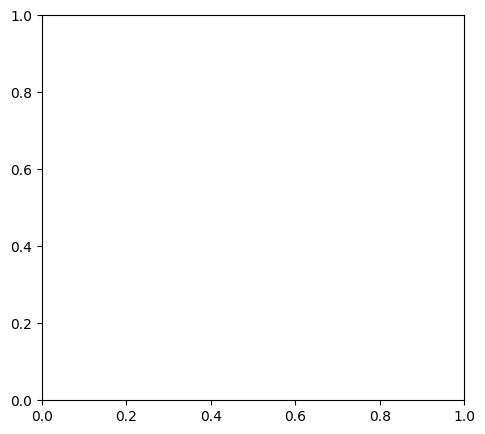

In [136]:
# Plot the metrics
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, val_losses[:num_epochs-100], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label="Train Accuracy")
plt.plot(epochs, val_accuracies[:num_epochs-100], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [137]:
times = measure_inference_time(model, test_loader, device)

Inference Time Measurement Results:
Total Inferences: 469
Average Time: 6.18 ms
Standard Deviation: 0.48 ms
Maximum Time: 9.73 ms
Minimum Time: 5.74 ms


In [138]:
from torch import profiler

dummy_input = torch.randn(32, 3, 224, 224).cuda()

# Profiling inference
with profiler.profile(
    activities=[
       profiler.ProfilerActivity.CPU,
        profiler.ProfilerActivity.CUDA,  # Include if using GPU
    ],
    on_trace_ready=profiler.tensorboard_trace_handler("./logs"),  # Optional logging
    record_shapes=True,
    with_stack=True
) as prof:
    with torch.no_grad():
        model(dummy_input, tau=0.1)


# Print results
print(prof.key_averages().table(sort_by="cuda_time_total" if torch.cuda.is_available() else "cpu_time_total", row_limit=10))

-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                           aten::matmul         1.41%     287.591us        38.10%       7.794ms     278.353us       0.000us         0.00%       1.519ms      54.238us            28  
                                           aten::linear         0.60%     121.864us        36.90%       7.549ms     290.349us       0.000us         0.00%       1.178ms      45.299us            26  
         

In [139]:
save_path = "HoViT_44_tinyfusion_base_r16a32_200.pth"
torch.save(model.state_dict(), save_path)
print(f"Model weights saved to {save_path}")

Model weights saved to HoViT_44_tinyfusion_base_r16a32_200.pth


In [140]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_curve, auc

def score_evaluate(model, data_loader, criterion, device, phase="Validation"):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc=f"{phase}"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs, tau=0.1)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    overall_f1 = f1_score(all_labels, all_preds, average="macro")
    overall_recall = recall_score(all_labels, all_preds, average="macro")
    overall_precision = precision_score(all_labels, all_preds, average="macro")

    f1_per_class = f1_score(all_labels, all_preds, average=None)
    recall_per_class = recall_score(all_labels, all_preds, average=None)
    precision_per_class = precision_score(all_labels, all_preds, average=None)
    class_labels = sorted(set(all_labels))

    epoch_loss = running_loss / len(data_loader)
    accuracy = 100 * correct / total
    print(f"{phase} Loss: {epoch_loss:.4f}, {phase} Accuracy: {accuracy:.2f}%")
    val_losses.append(epoch_loss)
    val_accuracies.append(accuracy)

    print(f"Overall - F1: {overall_f1:.4f}, Recall: {overall_recall:.4f}, Precision: {overall_precision:.4f}")
    print("Per-Class Metrics:")
    for i, label in enumerate(class_labels):
        print(f"Class {label} - F1: {f1_per_class[i]:.4f}, Recall: {recall_per_class[i]:.4f}, Precision: {precision_per_class[i]:.4f}")

    return overall_f1, overall_recall, overall_precision, f1_per_class, recall_per_class, precision_per_class

In [141]:
overall_f1, overall_recall, overall_precision, f1_per_class, recall_per_class, precision_per_class = score_evaluate(model, test_loader, criterion, device, phase="Test")

Test: 100%|██████████| 469/469 [00:21<00:00, 21.83it/s]


Test Loss: 0.0711, Test Accuracy: 98.69%
Overall - F1: 0.9868, Recall: 0.9871, Precision: 0.9865
Per-Class Metrics:
Class 0 - F1: 0.9978, Recall: 0.9968, Precision: 0.9987
Class 1 - F1: 0.9959, Recall: 0.9950, Precision: 0.9968
Class 2 - F1: 0.9776, Recall: 0.9751, Precision: 0.9802
Class 3 - F1: 0.9965, Recall: 0.9971, Precision: 0.9960
Class 4 - F1: 0.9814, Recall: 0.9888, Precision: 0.9742
Class 5 - F1: 0.9904, Recall: 0.9867, Precision: 0.9940
Class 6 - F1: 0.9840, Recall: 0.9848, Precision: 0.9833
Class 7 - F1: 0.9742, Recall: 0.9770, Precision: 0.9714
Class 8 - F1: 0.9835, Recall: 0.9828, Precision: 0.9841


<Figure size 2000x1200 with 0 Axes>

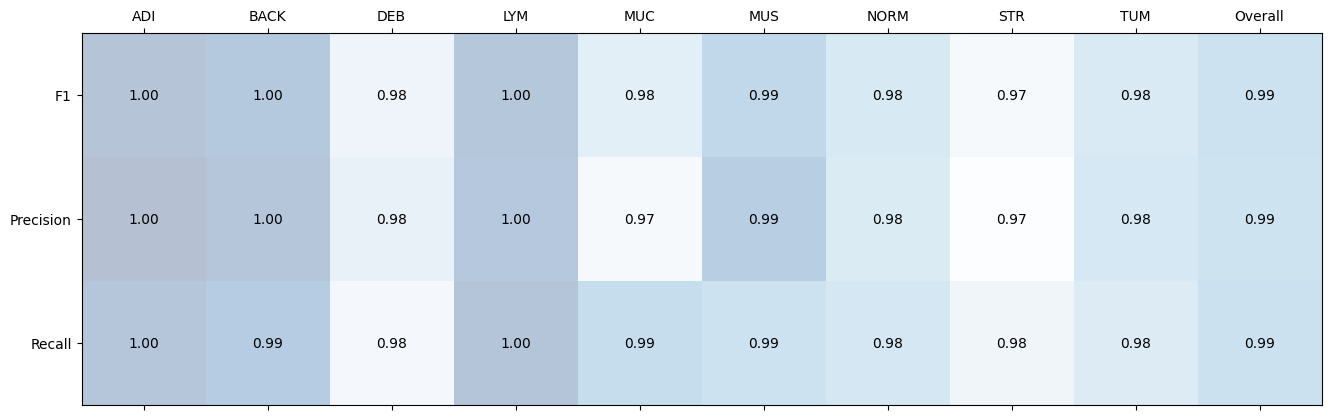

In [142]:
x = ["ADI", "BACK", "DEB", "LYM", "MUC", "MUS", "NORM", 'STR', "TUM"]
y = ["F1", "Precision", "Recall"]

f1_score_list = []
precision_score_list = []
recall_score_list = []

for i, class_name in enumerate(x):
    f1_score_list.append(f1_per_class[i])
    precision_score_list.append(precision_per_class[i])
    recall_score_list.append(recall_per_class[i])

x.append("Overall")
f1_score_list.append(overall_f1)
precision_score_list.append(overall_precision)
recall_score_list.append(overall_recall)

score_list = [f1_score_list, precision_score_list, recall_score_list]
score_list = np.array(score_list)
plt.figure(figsize=(20, 12))
score_cm = plt.matshow(score_list, cmap=plt.cm.Blues, alpha=0.3)
plt.xticks(range(len(x)), x)
plt.yticks(range(len(y)), y)
for i in range(len(y)):
    for j in range(len(x)):
        # 행렬의 각각의 수치를 각 칸의 중앙에 넣어준다
        plt.text(x=j, y=i,
                     s="{:.2f}".format(score_list[i, j]),
                     va='center',
                     ha='center',
                     )

In [143]:
total_params = sum(p.numel() for p in model.parameters())
print("총 파라미터의 개수:", total_params)

총 파라미터의 개수: 8830866
